In [1]:
#importing libraries
import pandas as pd
import os as os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from pandas_ml import ConfusionMatrix

In [2]:
os.getcwd()

'C:\\Users\\Gursimran\\Desktop\\Customer Churn\\Customer Churn'

In [3]:
os.chdir("C:/Users/Gursimran/Desktop/Customer Churn/Customer Churn")

In [4]:
os.getcwd()

'C:\\Users\\Gursimran\\Desktop\\Customer Churn\\Customer Churn'

In [5]:
CustomerData = pd.read_csv("Customer.csv")

In [6]:
CustomerData.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0      10001    15798485    Copley          565    France    Male   31   
1      10002    15588959     T'ang          569    France    Male   34   
2      10003    15624896        Ku          669    France  Female   20   
3      10004    15639629  McConnan          694    France    Male   39   
4      10005    15638852     Ts'ui          504     Spain    Male   28   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       1       0.00              1          0               1   
1       4       0.00              1          0               1   
2       7       0.00              2          1               0   
3       4  173255.48              1          1               1   
4      10  109291.36              1          1               1   

   EstimatedSalary  Exited  
0         20443.08       0  
1          4045.90       0  
2        128838.67       0  
3         81293.10       0  
4        187593.15       0

In [7]:
CustomerData.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
995      10996    15730373     Starks          531    France  Female   34   
996      10997    15716191      Dixon          575   Germany    Male   49   
997      10998    15673900  Wilkinson          520    France  Female   74   
998      10999    15581432     Oatley          675     Spain    Male   23   
999      11000    15669645      Tyler          684    France    Male   46   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
995      10  118306.79              1          1               0   
996       2  136822.70              1          1               0   
997       4       0.00              1          0               0   
998       8       0.00              2          0               0   
999      10       0.00              2          1               0   

     EstimatedSalary  Exited  
995         26493.05       0  
996          2487.74       0  
997         26742.92       0  
998        162342.21       0  
999        188772.98       0

In [8]:
CustomerData.shape

(1000, 14)

In [9]:
type(CustomerData)

pandas.core.frame.DataFrame

In [10]:
CustomerData.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#Converting Categorical variables to correct format
category_variables = ['Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember',
                      'Exited','Geography']
CustomerData[category_variables] = CustomerData[category_variables].apply(pd.Series.astype, dtype = 'category')

In [8]:
CustomerData.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [8]:
list(CustomerData)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [14]:
CustomerData.describe()

RowNumber    CustomerId  CreditScore          Age      Tenure  \
count   1000.000000  1.000000e+03  1000.000000  1000.000000  1000.00000   
mean   10500.500000  1.569274e+07   652.187000    39.220000     4.86000   
std      288.819436  7.313593e+04    97.936201    10.764826     2.91082   
min    10001.000000  1.556586e+07   366.000000    18.000000     0.00000   
25%    10250.750000  1.562966e+07   582.000000    32.000000     2.00000   
50%    10500.500000  1.569516e+07   656.000000    38.000000     5.00000   
75%    10750.250000  1.575500e+07   719.000000    44.000000     7.00000   
max    11000.000000  1.581546e+07   850.000000    91.000000    10.00000   

             Balance  EstimatedSalary  
count    1000.000000       1000.00000  
mean    75160.026950     101500.36066  
std     62975.377861      57860.87521  
min         0.000000        245.50000  
25%         0.000000      49099.87250  
50%     97926.720000     104081.61000  
75%    128141.972500     151514.41750  
max    211520.250000     199633.73000

In [15]:
CustomerData.isnull().values.any()

False

In [16]:
CustomerData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    1000.000000
mean      652.187000
std        97.936201
min       366.000000
25%       582.000000
50%       656.000000
75%       719.000000
max       850.000000
Name: CreditScore, dtype: float64

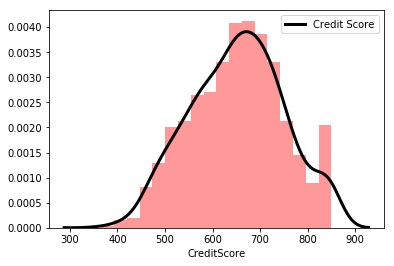

In [17]:
sns.distplot(CustomerData['CreditScore'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Credit Score"})
CustomerData['CreditScore'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    1000.000000
mean       39.220000
std        10.764826
min        18.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        91.000000
Name: Age, dtype: float64

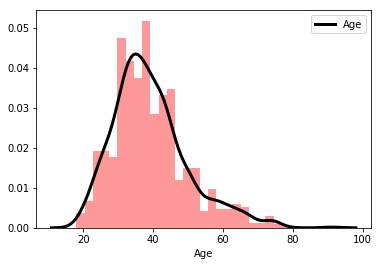

In [18]:
sns.distplot(CustomerData['Age'],color="red",kde_kws={"color":"k","lw":3,"label":"Age"})
CustomerData['Age'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count      1000.00000
mean     101500.36066
std       57860.87521
min         245.50000
25%       49099.87250
50%      104081.61000
75%      151514.41750
max      199633.73000
Name: EstimatedSalary, dtype: float64

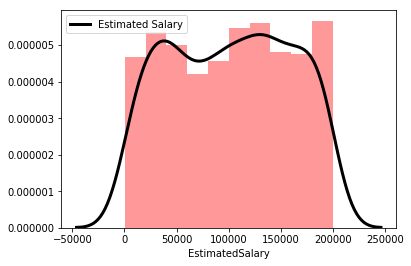

In [19]:
sns.distplot(CustomerData['EstimatedSalary'],color='red',kde_kws={"color":"k","lw":3,"label":"Estimated Salary"})
CustomerData['EstimatedSalary'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    1000.00000
mean        4.86000
std         2.91082
min         0.00000
25%         2.00000
50%         5.00000
75%         7.00000
max        10.00000
Name: Tenure, dtype: float64

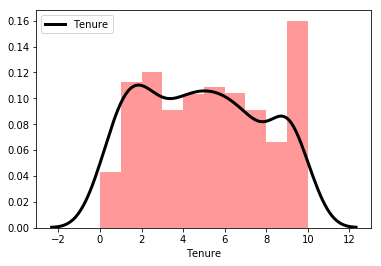

In [20]:
sns.distplot(CustomerData['Tenure'],color="red",kde_kws={"color":"k","lw":3,"label":"Tenure"})
CustomerData['Tenure'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count      1000.000000
mean      75160.026950
std       62975.377861
min           0.000000
25%           0.000000
50%       97926.720000
75%      128141.972500
max      211520.250000
Name: Balance, dtype: float64

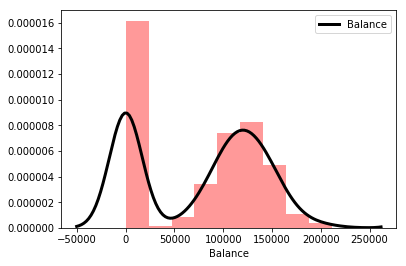

In [21]:
sns.distplot(CustomerData['Balance'],color="red",kde_kws={"color":"k","label":"Balance","lw":3})
CustomerData['Balance'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


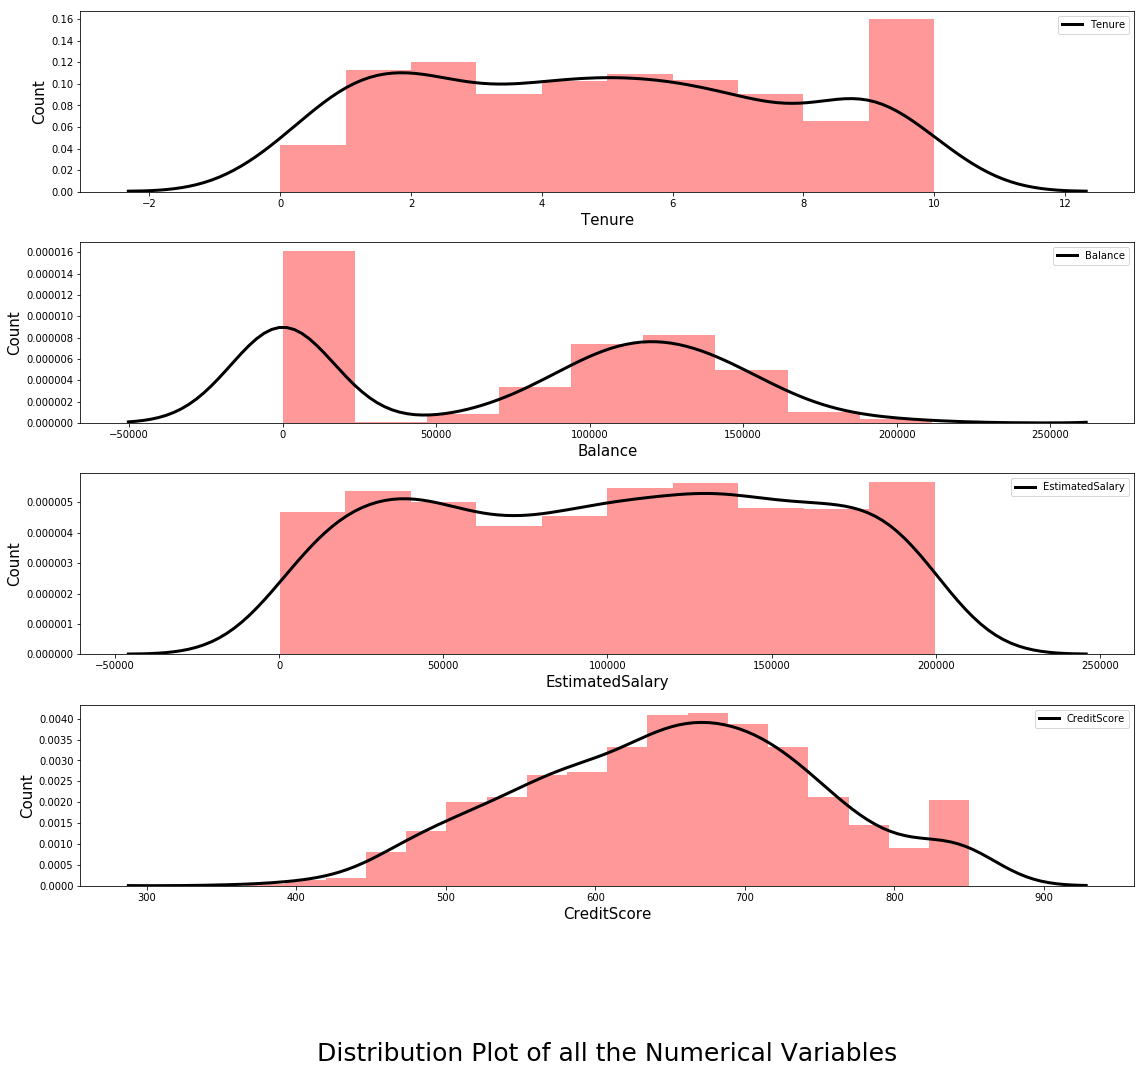

In [22]:
col_names = ['Tenure','Balance','EstimatedSalary','CreditScore']
fig, ax = plt.subplots(len(col_names), figsize=(16,15))
plt.title("Distribution Plot of all the Numerical Variables",x=0.5,y=-1,fontsize=25)
for i, col_val in enumerate(col_names):
    sns.distplot(CustomerData[col_val], hist=True, ax=ax[i],color='red',kde_kws={"color": "k", "lw": 3, "label":col_val})
    ax[i].set_xlabel(col_val, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=15)
    plt.tight_layout()
plt.show()

In [23]:
#Skewness and Kurosis of Credit Score Variable
print("Skewness: %f" % CustomerData['CreditScore'].skew())
print("Kurtosis: %f" % CustomerData['CreditScore'].kurt())

Skewness: -0.049586
Kurtosis: -0.483387


In [24]:
#Skewness and Kurosis of Estimated Salary Varibale
print("Skewness: %f" % CustomerData['EstimatedSalary'].skew())
print("Kurtosis: %f" % CustomerData['EstimatedSalary'].kurt())

Skewness: -0.031381
Kurtosis: -1.214285


In [25]:
#Skewness and Kurosis of Tenure Varibale
print("Skewness: %f" % CustomerData['Tenure'].skew())
print("Kurtosis: %f" % CustomerData['Tenure'].kurt())

Skewness: 0.108251
Kurtosis: -1.141196


In [26]:
#Skewness and Kurosis of Balance Varibale
print("Skewness: %f" % CustomerData['Balance'].skew())
print("Kurtosis: %f" % CustomerData['Balance'].kurt())

Skewness: -0.120416
Kurtosis: -1.543766


In [27]:
#Skewness and Kurosis of Balance Varibale
print("Skewness: %f" % CustomerData['Age'].skew())
print("Kurtosis: %f" % CustomerData['Age'].kurt())

Skewness: 0.943019
Kurtosis: 1.201709


In [29]:
#groupedvalues=CustomerData.groupby('Geography').sum().reset_index()
#print(groupedvalues)

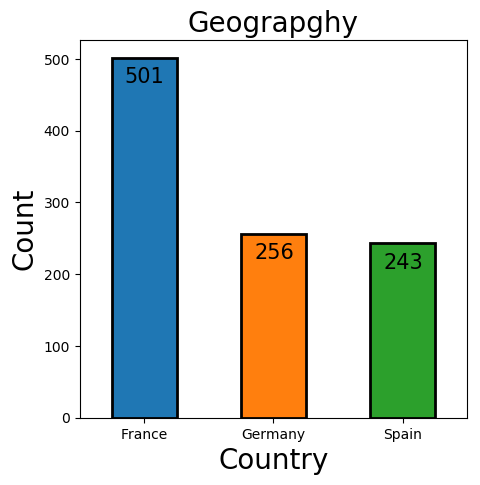

In [28]:
#Univariate analysis of categorical variables.
#Geograpghy attribute
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
ax = CustomerData['Geography'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Geograpghy", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(rotation = 0)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-35, \
            str(round((i.get_height()), 2)), fontsize=15,
                color='black')

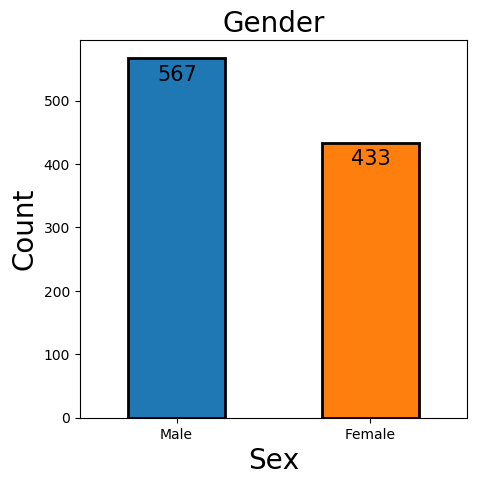

In [31]:
#Univariate analysis of categorical variables.
#Gender attribute
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
ax = CustomerData['Gender'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Gender", fontsize=20)
ax.set_xlabel("Sex", fontsize=20)
plt.xticks(rotation = 0)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-35, \
            str(round((i.get_height()), 2)), fontsize=15,
                color='black')

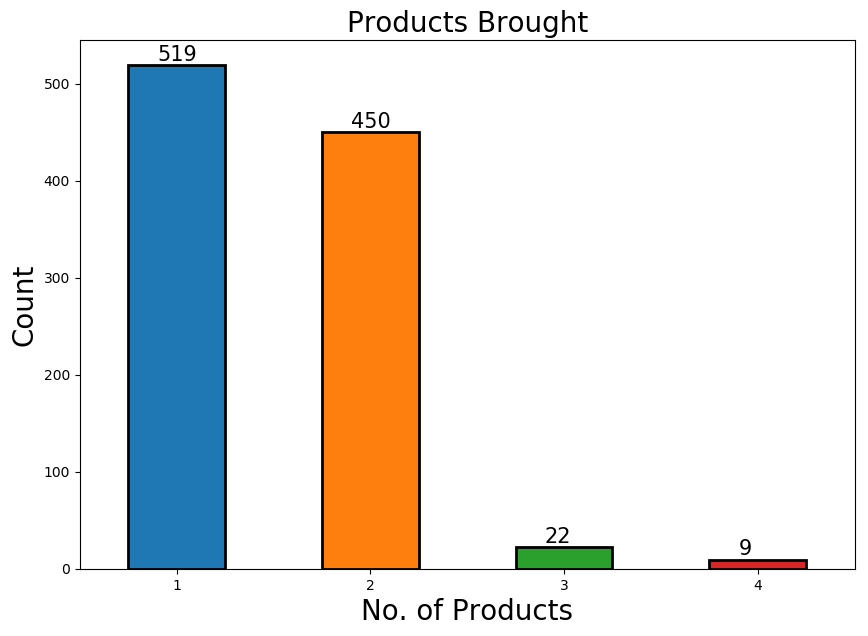

In [32]:
#Univariate analysis of categorical variables.
#Number of Products attribute
fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')
ax = CustomerData['NumOfProducts'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Products Brought", fontsize=20)
ax.set_xlabel("No. of Products", fontsize=20)
plt.xticks(rotation = 0)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+5, \
            str(round((i.get_height()))), fontsize=15,
                color='black')

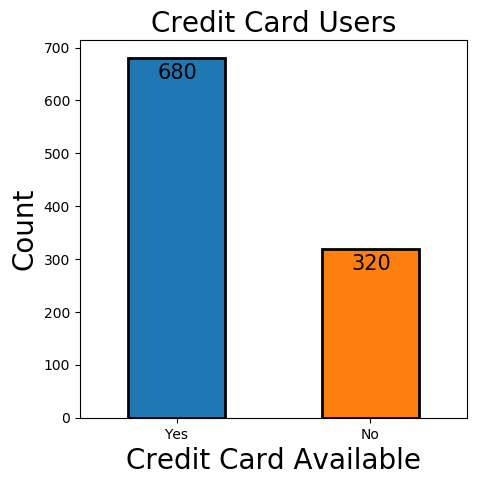

In [33]:
#Univariate analysis of categorical variables.
#Credit Card attribute
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
ax = CustomerData['HasCrCard'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Credit Card Users", fontsize=20)
ax.set_xlabel("Credit Card Available", fontsize=20)
plt.xticks(rotation = 0)
ax.set_xticklabels(labels=["Yes","No"])
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-40, \
            str(round((i.get_height()))), fontsize=15,
                color='black')

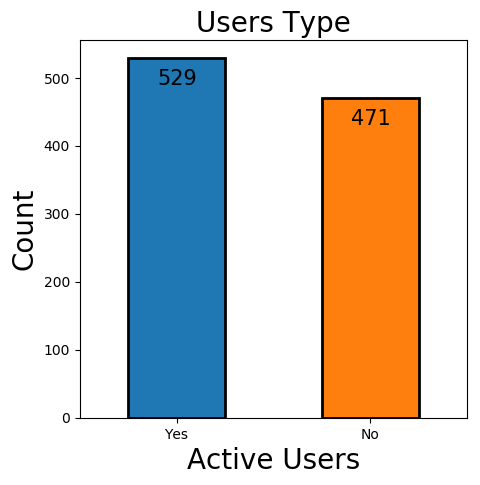

In [34]:
#Univariate analysis of categorical variables.
#Active Member attribute
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
ax = CustomerData['IsActiveMember'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Users Type", fontsize=20)
ax.set_xlabel("Active Users", fontsize=20)
plt.xticks(rotation = 0)
ax.set_xticklabels(labels=["Yes","No"])
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-40, \
            str(round((i.get_height()))), fontsize=15,
                color='black')

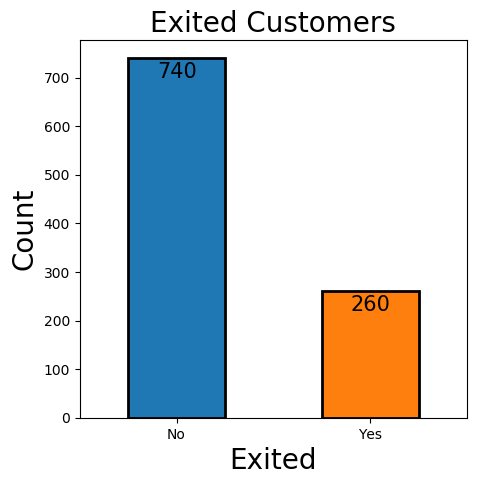

In [35]:
#Univariate analysis of categorical variables.
#Active Member attribute
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
ax = CustomerData['Exited'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Exited Customers", fontsize=20)
ax.set_xlabel("Exited", fontsize=20)
plt.xticks(rotation = 0)
ax.set_xticklabels(labels=["No","Yes"])
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-40, \
            str(round((i.get_height()))), fontsize=15,
                color='black')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Credit Score and Tenure')

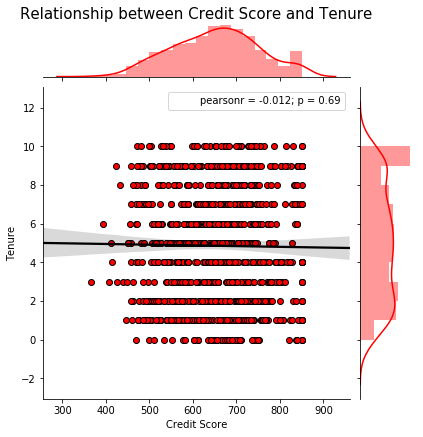

In [35]:
#Bivariate Analysis
#Relation between Credit Score and Tenure
CustomerData['CreditScore'].value_counts()
CustomerData['Tenure'].value_counts()
ax = sns.jointplot("CreditScore","Tenure",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Credit Score")
plt.ylabel("Tenure")
plt.title("Relationship between Credit Score and Tenure",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Credit Score and Balance')

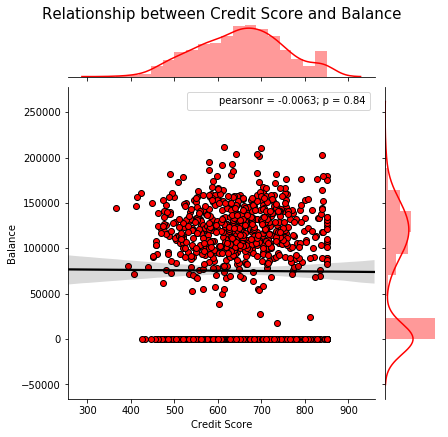

In [36]:
#Bivariate Analysis
#Relation between Credit Score and Balance
CustomerData['CreditScore'].value_counts()
CustomerData['Balance'].value_counts()
ax = sns.jointplot("CreditScore","Balance",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Credit Score")
plt.ylabel("Balance")
plt.title("Relationship between Credit Score and Balance",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Credit Score and Estimated Salary')

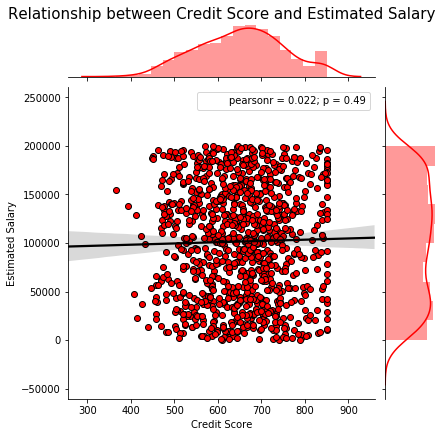

In [37]:
#Bivariate Analysis
#Relation between Credit Score and Estimated Salary
CustomerData['CreditScore'].value_counts()
CustomerData['EstimatedSalary'].value_counts()
ax = sns.jointplot("CreditScore","EstimatedSalary",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Credit Score")
plt.ylabel("Estimated Salary")
plt.title("Relationship between Credit Score and Estimated Salary",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Credit Score and Age')

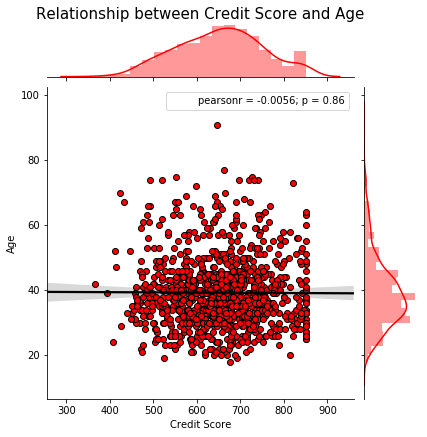

In [38]:
#Bivariate Analysis
#Relation between Credit Score and Estimated Salary
CustomerData['CreditScore'].value_counts()
CustomerData['Age'].value_counts()
ax = sns.jointplot("CreditScore","Age",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Credit Score")
plt.ylabel("Age")
plt.title("Relationship between Credit Score and Age",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Tenure and Balance')

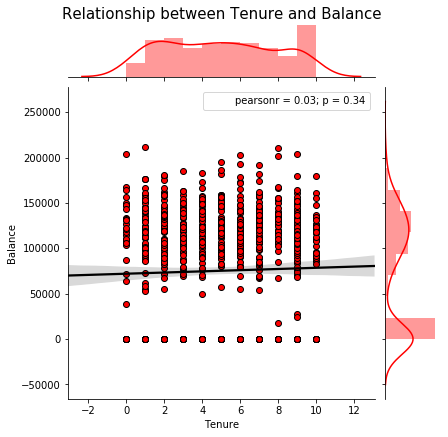

In [39]:
#Bivariate Analysis
#Relation between Tenure and Balance
CustomerData['Tenure'].value_counts()
CustomerData['Balance'].value_counts()
ax = sns.jointplot("Tenure","Balance",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Tenure")
plt.ylabel("Balance")
plt.title("Relationship between Tenure and Balance",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Tenure and Estimated Salary')

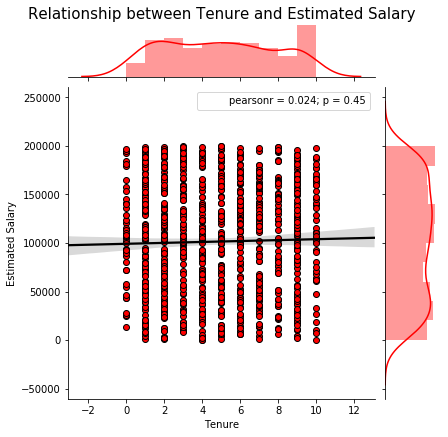

In [40]:
#Bivariate Analysis
#Relation between Tenure and Estimated Salary
CustomerData['Tenure'].value_counts()
CustomerData['EstimatedSalary'].value_counts()
ax = sns.jointplot("Tenure","EstimatedSalary",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Tenure")
plt.ylabel("Estimated Salary")
plt.title("Relationship between Tenure and Estimated Salary",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Tenure and Age')

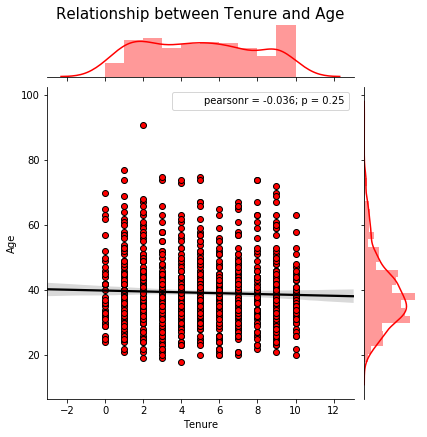

In [41]:
#Bivariate Analysis
#Relation between Tenure and Estimated Salary
CustomerData['Tenure'].value_counts()
CustomerData['Age'].value_counts()
ax = sns.jointplot("Tenure","Age",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Tenure")
plt.ylabel("Age")
plt.title("Relationship between Tenure and Age",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Balance and Estimated Salary')

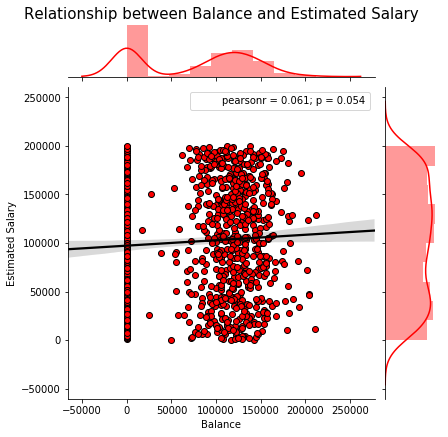

In [42]:
#Bivariate Analysis
#Relation between Balance and Estimated Salary
CustomerData['Balance'].value_counts()
CustomerData['EstimatedSalary'].value_counts()
ax = sns.jointplot("Balance","EstimatedSalary",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Balance")
plt.ylabel("Estimated Salary")
plt.title("Relationship between Balance and Estimated Salary",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Balance and Age')

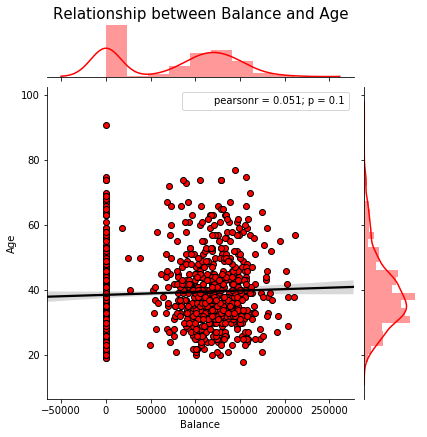

In [43]:
#Bivariate Analysis
#Relation between Balance and Age
CustomerData['Balance'].value_counts()
CustomerData['Age'].value_counts()
ax = sns.jointplot("Balance","Age",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Balance")
plt.ylabel("Age")
plt.title("Relationship between Balance and Age",x=0.5,y=1.2,fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.2,'Relationship between Estimated Salary and Age')

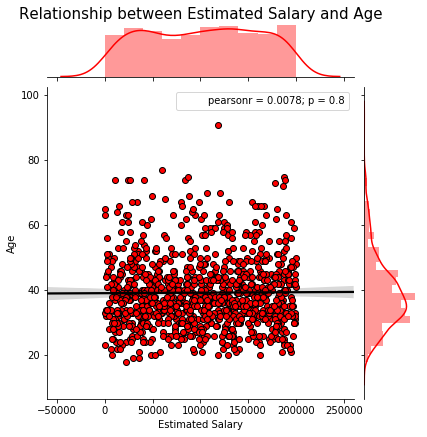

In [44]:
#Bivariate Analysis
#Relation between Estimated Salary and Age
CustomerData['EstimatedSalary'].value_counts()
CustomerData['Age'].value_counts()
ax = sns.jointplot("EstimatedSalary","Age",data=CustomerData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
plt.xlabel("Estimated Salary")
plt.ylabel("Age")
plt.title("Relationship between Estimated Salary and Age",x=0.5,y=1.2,fontsize=15)

In [45]:
#Cross Table for Categoriacal variable
Group1 = pd.crosstab(CustomerData.Geography,CustomerData.Gender)
Group1

Gender     Female  Male
Geography              
France        212   289
Spain          97   146
Germany       124   132

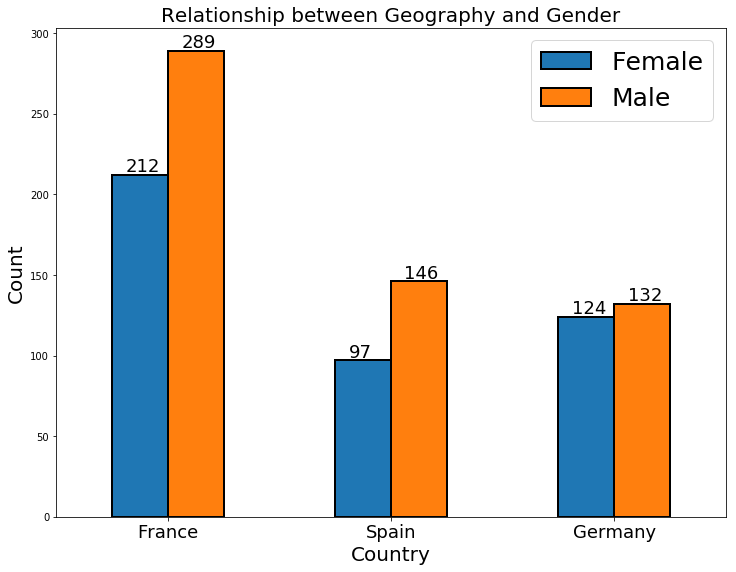

In [46]:
Group1 = pd.crosstab(CustomerData.Geography,CustomerData.Gender)
Group1
ax = Group1.loc[:,['Female','Male']].plot.bar(stacked=False, figsize=(12,9),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.legend(["Female","Male"],loc=1,fontsize=25)
ax.set_title("Relationship between Geography and Gender", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(rotation = 0,fontsize=18)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [47]:
#Cross Table for Categoriacal variable
Group2 = pd.crosstab(CustomerData.Geography,CustomerData.NumOfProducts)
Group2

NumOfProducts    1    2  3  4
Geography                    
France         249  240  9  3
Spain          126  113  4  0
Germany        144   97  9  6

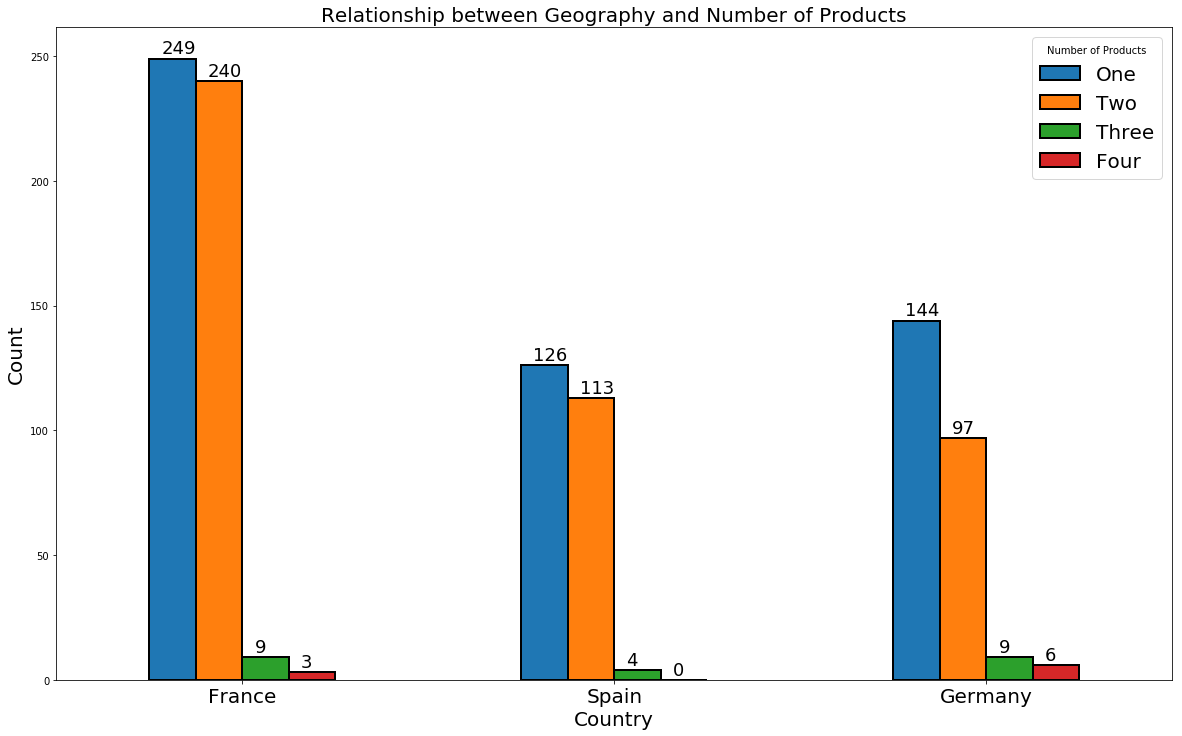

In [48]:
Group2 = pd.crosstab(CustomerData.Geography,CustomerData.NumOfProducts)
Group2
ax = Group2.loc[['France','Spain','Germany'],:].plot.bar(stacked=False, figsize=(20,12),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.legend(["One","Two","Three","Four"],loc=1,fontsize=20,title='Number of Products')
ax.set_title("Relationship between Geography and Number of Products", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.033, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [49]:
#Cross Table for Categoriacal variable
Group3 = pd.crosstab(CustomerData.Geography,CustomerData.HasCrCard)
Group3

HasCrCard    0    1
Geography          
France     161  340
Spain       75  168
Germany     84  172

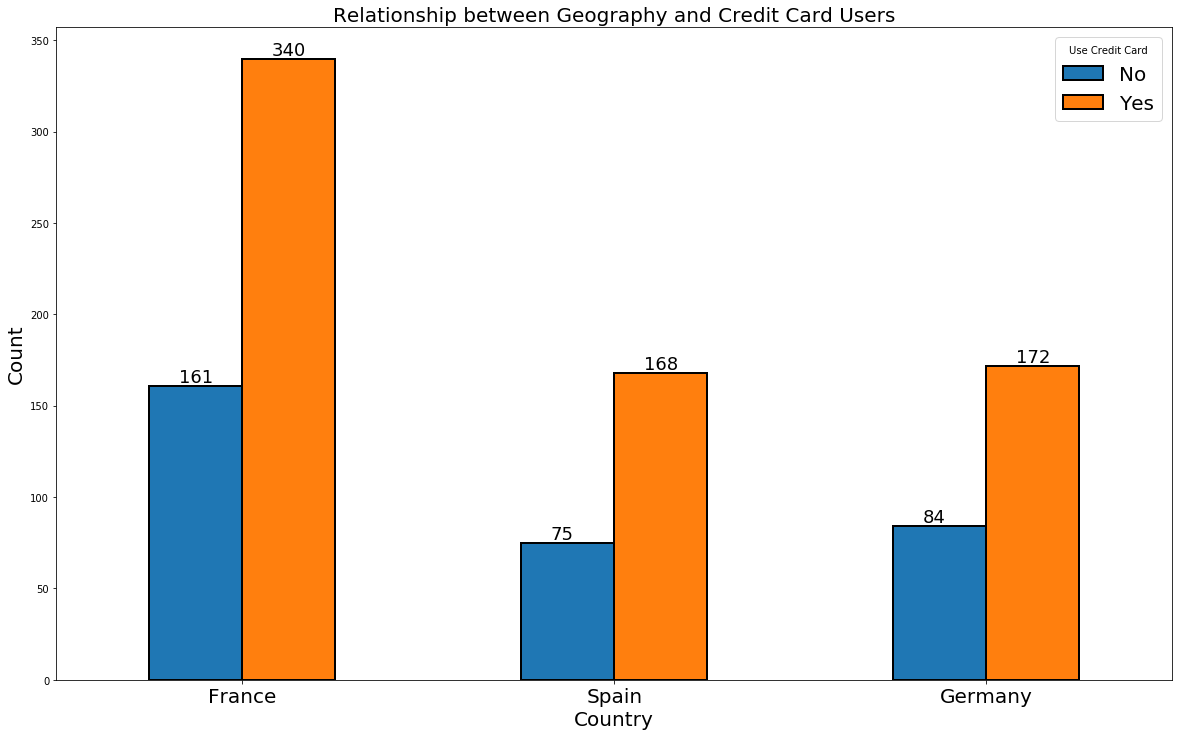

In [50]:
Group3 = pd.crosstab(CustomerData.Geography,CustomerData.HasCrCard)
Group3
ax = Group3.loc[['France','Spain','Germany'],:].plot.bar(stacked=False, figsize=(20,12),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.legend(["No","Yes"],loc=1,fontsize=20,title='Use Credit Card')
ax.set_title("Relationship between Geography and Credit Card Users", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [51]:
#Cross Table for Categoriacal variable
Group4 = pd.crosstab(CustomerData.Geography,CustomerData.IsActiveMember)
Group4

IsActiveMember    0    1
Geography               
France          228  273
Spain           108  135
Germany         135  121

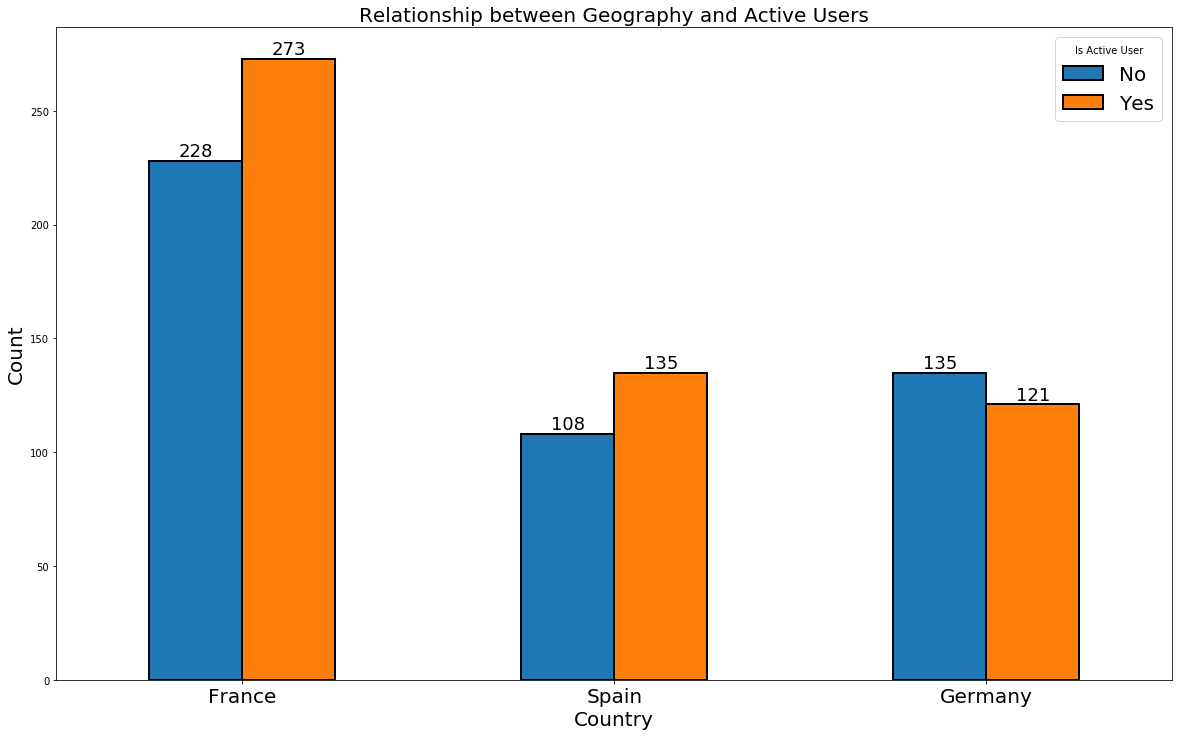

In [52]:
Group4 = pd.crosstab(CustomerData.Geography,CustomerData.IsActiveMember)
Group4
ax = Group4.loc[['France','Spain','Germany'],:].plot.bar(stacked=False, figsize=(20,12),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.legend(["No","Yes"],loc=1,fontsize=20,title='Is Active User')
ax.set_title("Relationship between Geography and Active Users", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [53]:
#Cross Table for Categoriacal variable
Group5 = pd.crosstab(CustomerData.Geography,CustomerData.Exited)
Group5

Exited       0    1
Geography          
France     379  122
Spain      198   45
Germany    163   93

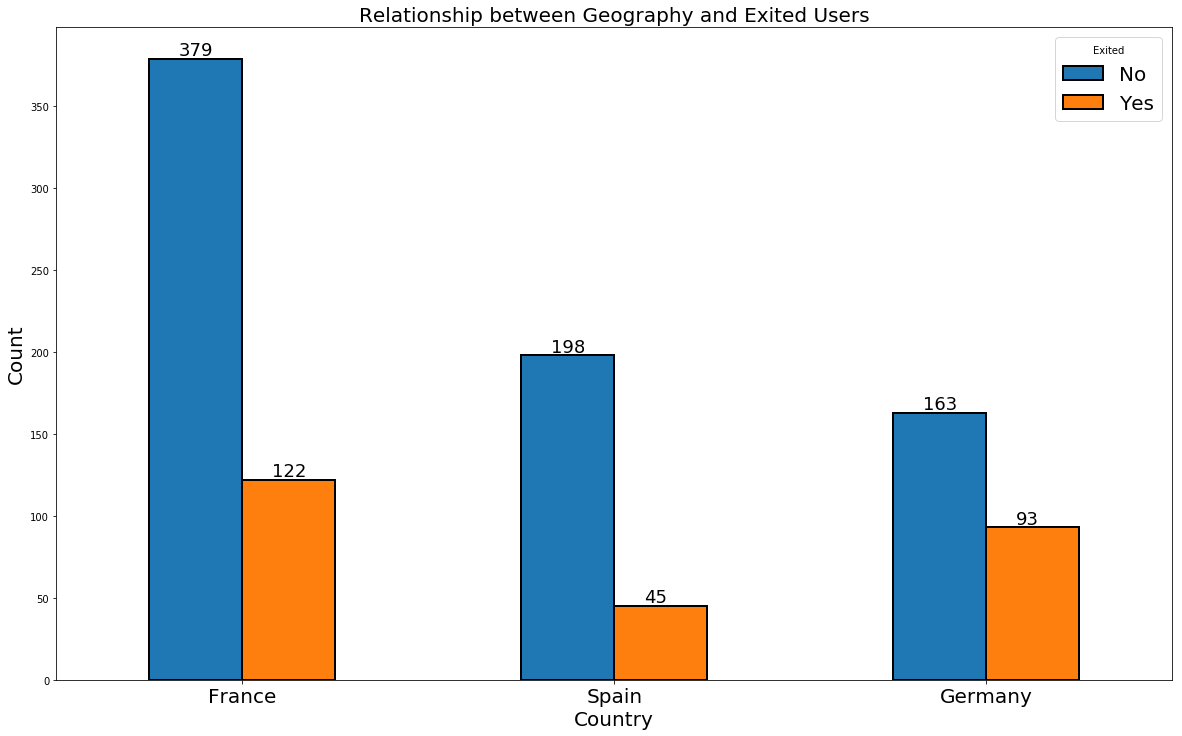

In [54]:
Group5 = pd.crosstab(CustomerData.Geography,CustomerData.Exited)
Group5
ax = Group5.loc[['France','Spain','Germany'],:].plot.bar(stacked=False, figsize=(20,12),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.legend(["No","Yes"],loc=1,fontsize=20,title='Exited')
ax.set_title("Relationship between Geography and Exited Users", fontsize=20)
ax.set_xlabel("Country", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [55]:
#Cross Table for Categoriacal variable
Group6 = pd.crosstab(CustomerData.Gender,CustomerData.Exited)
Group6

Exited    0    1
Gender          
Male    444  123
Female  296  137

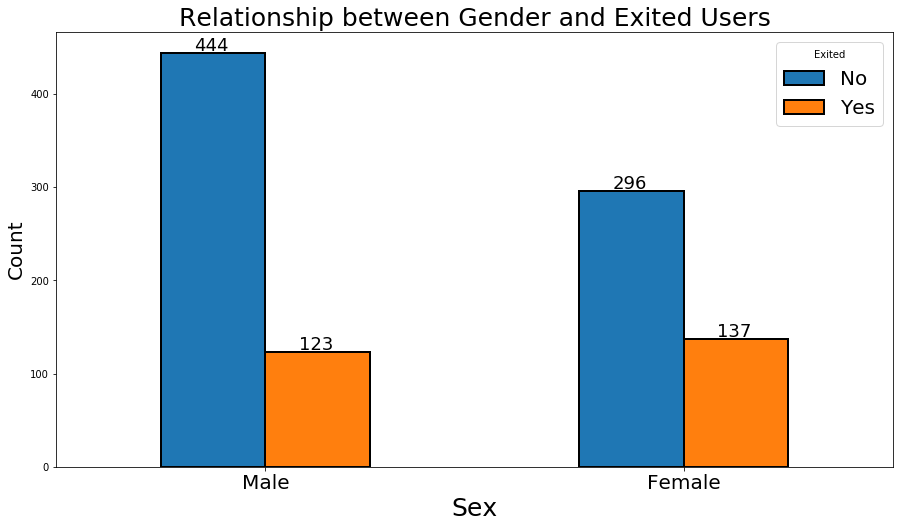

In [56]:
Group6 = pd.crosstab(CustomerData.Gender,CustomerData.Exited)
Group6
ax = Group6.loc[['Male','Female'],:].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.legend(["No","Yes"],loc=1,fontsize=20,title='Exited')
ax.set_title("Relationship between Gender and Exited Users", fontsize=25)
ax.set_xlabel("Sex", fontsize=25)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [57]:
#Cross Table for Categoriacal variable
Group7 = pd.crosstab(CustomerData.Gender,CustomerData.IsActiveMember)
Group7

IsActiveMember    0    1
Gender                  
Male            270  297
Female          201  232

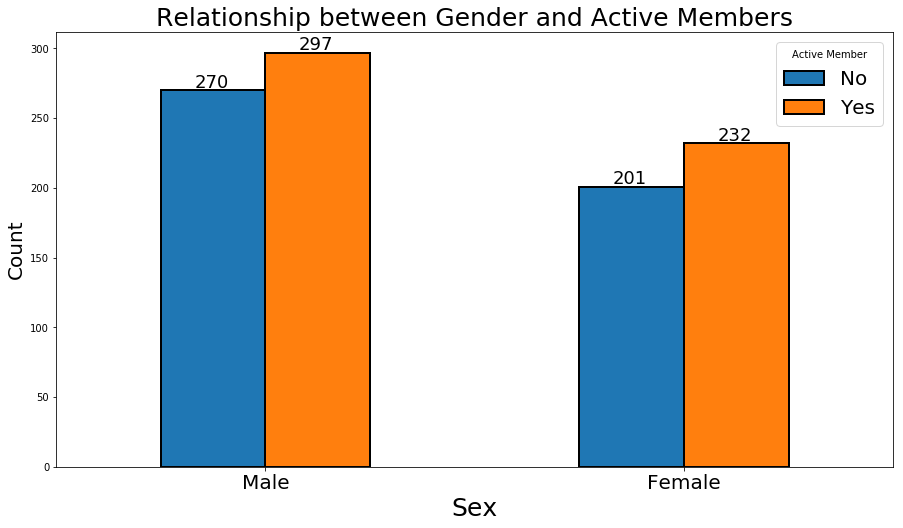

In [58]:
Group7 = pd.crosstab(CustomerData.Gender,CustomerData.IsActiveMember)
Group7
ax = Group7.loc[['Male','Female'],:].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Gender and Active Members", fontsize=25)
ax.legend(["No","Yes"],loc=1,fontsize=20,title='Active Member')
ax.set_xlabel("Sex", fontsize=25)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [59]:
#Cross Table for Categoriacal variable
Group8 = pd.crosstab(CustomerData.Gender,CustomerData.HasCrCard)
Group8

HasCrCard    0    1
Gender             
Male       188  379
Female     132  301

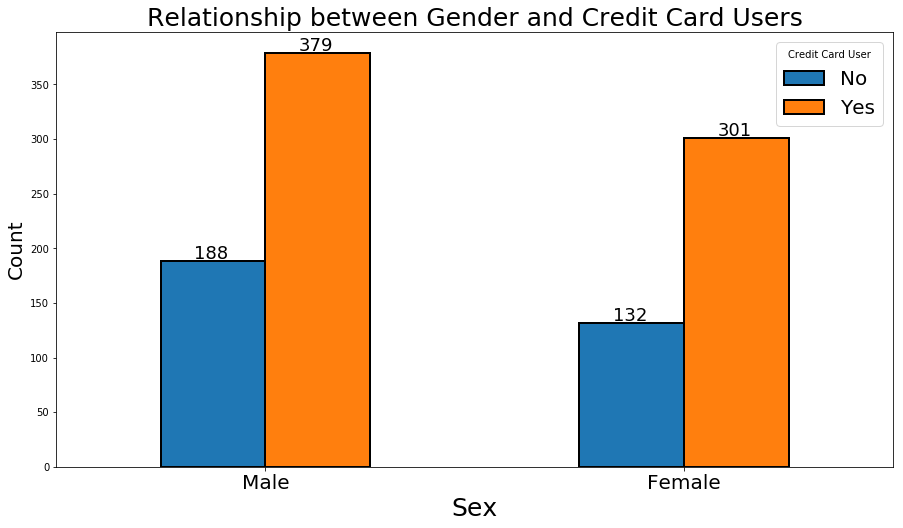

In [60]:
Group8 = pd.crosstab(CustomerData.Gender,CustomerData.HasCrCard)
Group8
ax = Group8.loc[['Male','Female'],:].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Gender and Credit Card Users", fontsize=25)
ax.legend(["No","Yes"],loc=1,fontsize=20,title='Credit Card User')
ax.set_xlabel("Sex", fontsize=25)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [61]:
#Cross Table for Categoriacal variable
Group9 = pd.crosstab(CustomerData.Gender,CustomerData.NumOfProducts)
Group9

NumOfProducts    1    2   3  4
Gender                        
Male           281  272  10  4
Female         238  178  12  5

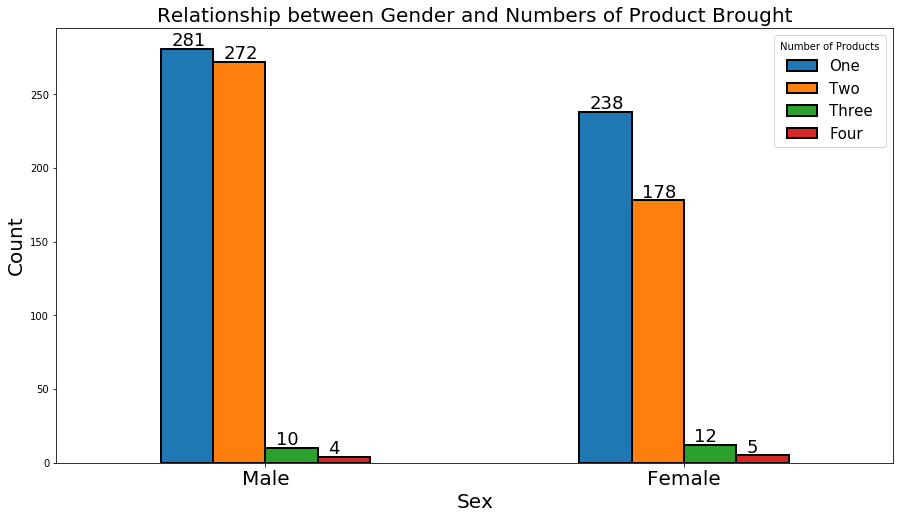

In [62]:
Group9 = pd.crosstab(CustomerData.Gender,CustomerData.NumOfProducts)
Group9
ax = Group9.loc[['Male','Female'],:].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Gender and Numbers of Product Brought", fontsize=20)
ax.legend(["One","Two","Three","Four"],loc=1,fontsize=15,title='Number of Products')
ax.set_xlabel("Sex", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.025, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [63]:
#Cross Table for Categoriacal variable
Group10 = pd.crosstab(CustomerData.NumOfProducts,CustomerData.HasCrCard)
Group10

HasCrCard        0    1
NumOfProducts          
1              174  345
2              139  311
3                5   17
4                2    7

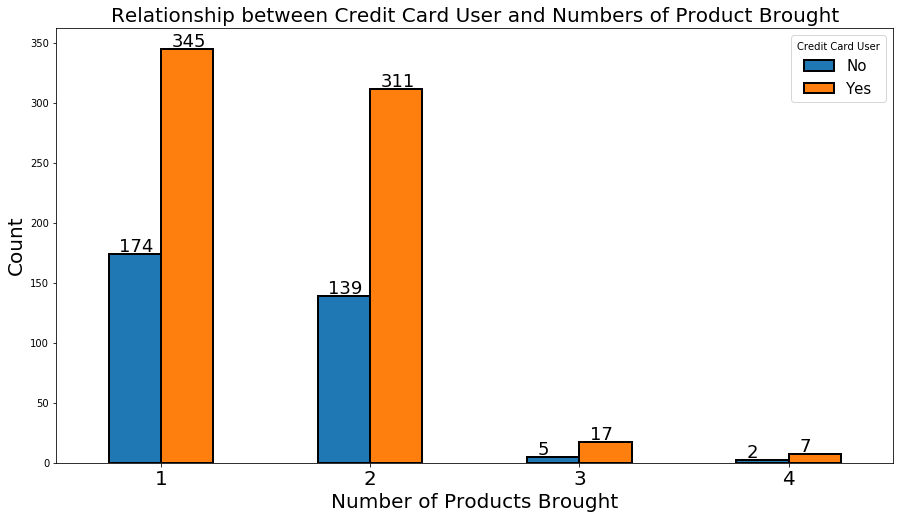

In [64]:
Group10 = pd.crosstab(CustomerData.NumOfProducts,CustomerData.HasCrCard)
Group10
ax = Group10.loc[:,[0,1]].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Credit Card User and Numbers of Product Brought", fontsize=20)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Credit Card User')
ax.set_xlabel("Number of Products Brought", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [65]:
#Cross Table for Categoriacal variable
Group11 = pd.crosstab(CustomerData.NumOfProducts,CustomerData.IsActiveMember)
Group11

IsActiveMember    0    1
NumOfProducts           
1               250  269
2               205  245
3                12   10
4                 4    5

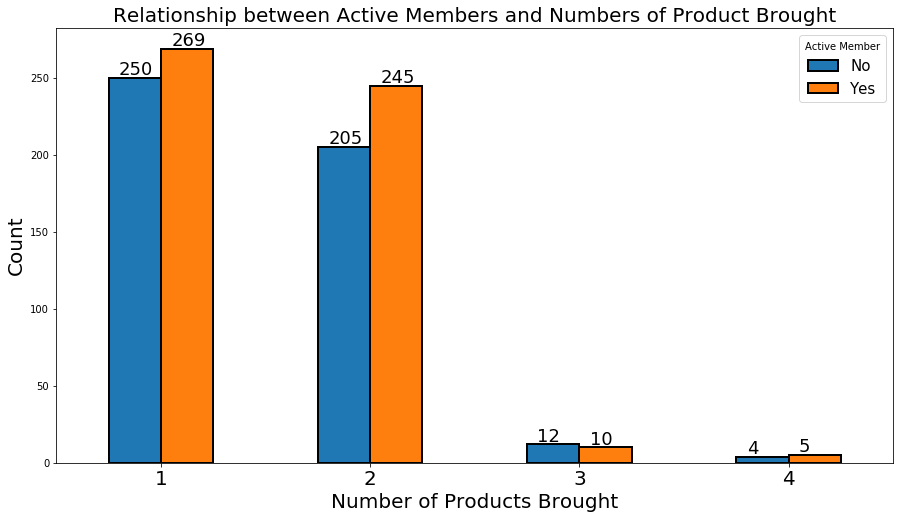

In [66]:
Group11 = pd.crosstab(CustomerData.NumOfProducts,CustomerData.IsActiveMember)
Group11
ax = Group11.loc[:,[0,1]].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Active Members and Numbers of Product Brought", fontsize=20)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Active Member')
ax.set_xlabel("Number of Products Brought", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [67]:
#Cross Table for Categoriacal variable
Group12 = pd.crosstab(CustomerData.NumOfProducts,CustomerData.Exited)
Group12

Exited           0    1
NumOfProducts          
1              343  176
2              392   58
3                5   17
4                0    9

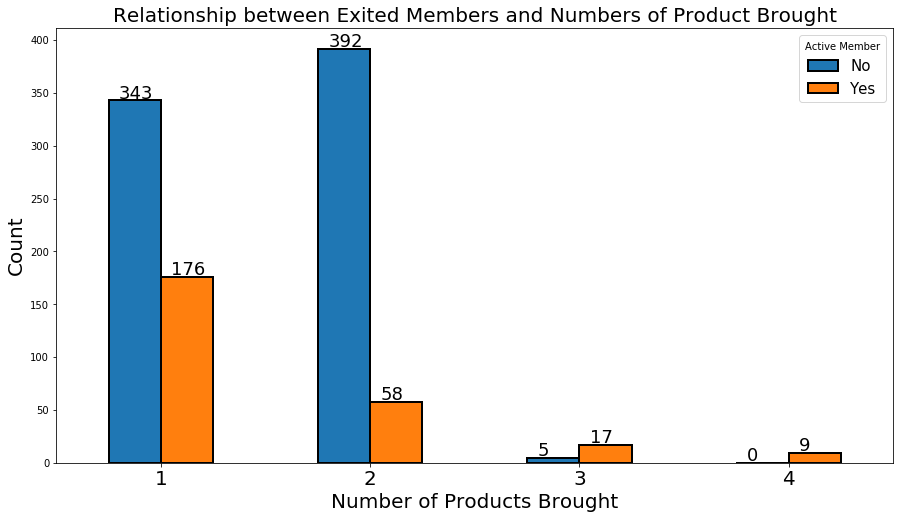

In [68]:
Group12 = pd.crosstab(CustomerData.NumOfProducts,CustomerData.Exited)
Group12
ax = Group12.loc[:,[0,1]].plot.bar(stacked=False, figsize=(15,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Exited Members and Numbers of Product Brought", fontsize=20)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Active Member')
ax.set_xlabel("Number of Products Brought", fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [69]:
#Cross Table for Categoriacal variable
Group13 = pd.crosstab(CustomerData.HasCrCard,CustomerData.IsActiveMember)
Group13

IsActiveMember    0    1
HasCrCard               
0               155  165
1               316  364

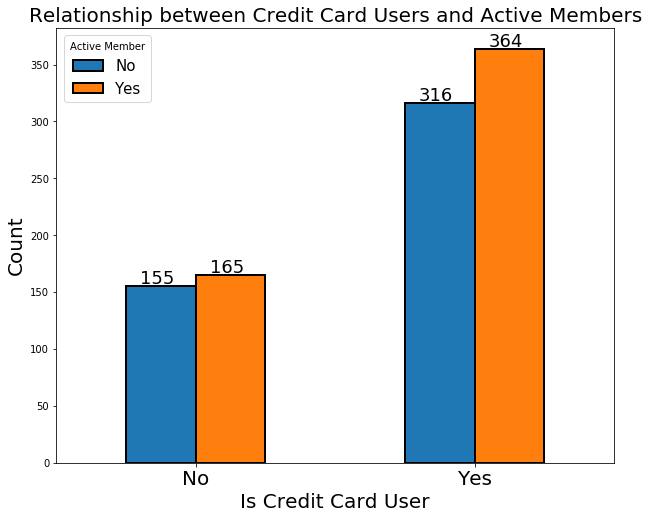

In [70]:
Group13 = pd.crosstab(CustomerData.HasCrCard,CustomerData.IsActiveMember)
Group13
ax = Group13.loc[:,[0,1]].plot.bar(stacked=False, figsize=(10,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Credit Card Users and Active Members", fontsize=20)
ax.legend(["No","Yes"],loc=2,fontsize=15,title='Active Member')
ax.set_xlabel("Is Credit Card User", fontsize=20)
ax.set_xticklabels(["No","Yes"])
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [71]:
#Cross Table for Categoriacal variable
Group14 = pd.crosstab(CustomerData.HasCrCard,CustomerData.Exited)
Group14

Exited       0    1
HasCrCard          
0          230   90
1          510  170

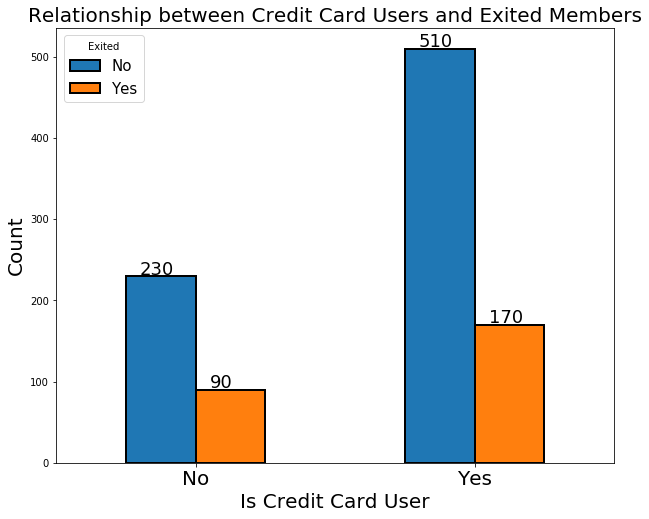

In [72]:
Group14 = pd.crosstab(CustomerData.HasCrCard,CustomerData.Exited)
Group14
ax = Group14.loc[:,[0,1]].plot.bar(stacked=False, figsize=(10,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Credit Card Users and Exited Members", fontsize=20)
ax.legend(["No","Yes"],loc=2,fontsize=15,title='Exited')
ax.set_xlabel("Is Credit Card User", fontsize=20)
ax.set_xticklabels(["No","Yes"])
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+2, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

In [73]:
#Cross Table for Categoriacal variable
Group15 = pd.crosstab(CustomerData.IsActiveMember,CustomerData.Exited)
Group15

Exited            0    1
IsActiveMember          
1               421  108
0               319  152

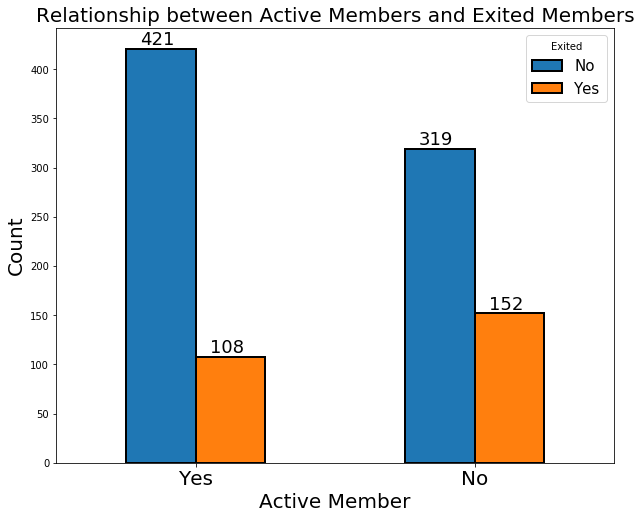

In [74]:
Group15 = pd.crosstab(CustomerData.IsActiveMember,CustomerData.Exited)
Group15
ax = Group15.loc[:,[0,1]].plot.bar(stacked=False, figsize=(10,8),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(2)
ax.set_title("Relationship between Active Members and Exited Members", fontsize=20)
ax.set_xlabel("Active Member", fontsize=20)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Exited')
ax.set_xticklabels(["Yes","No"])
plt.xticks(rotation = 0,fontsize=20)
ax.set_ylabel("Count", fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+4, \
            str(round((i.get_height()))), fontsize=18,
                color='black')

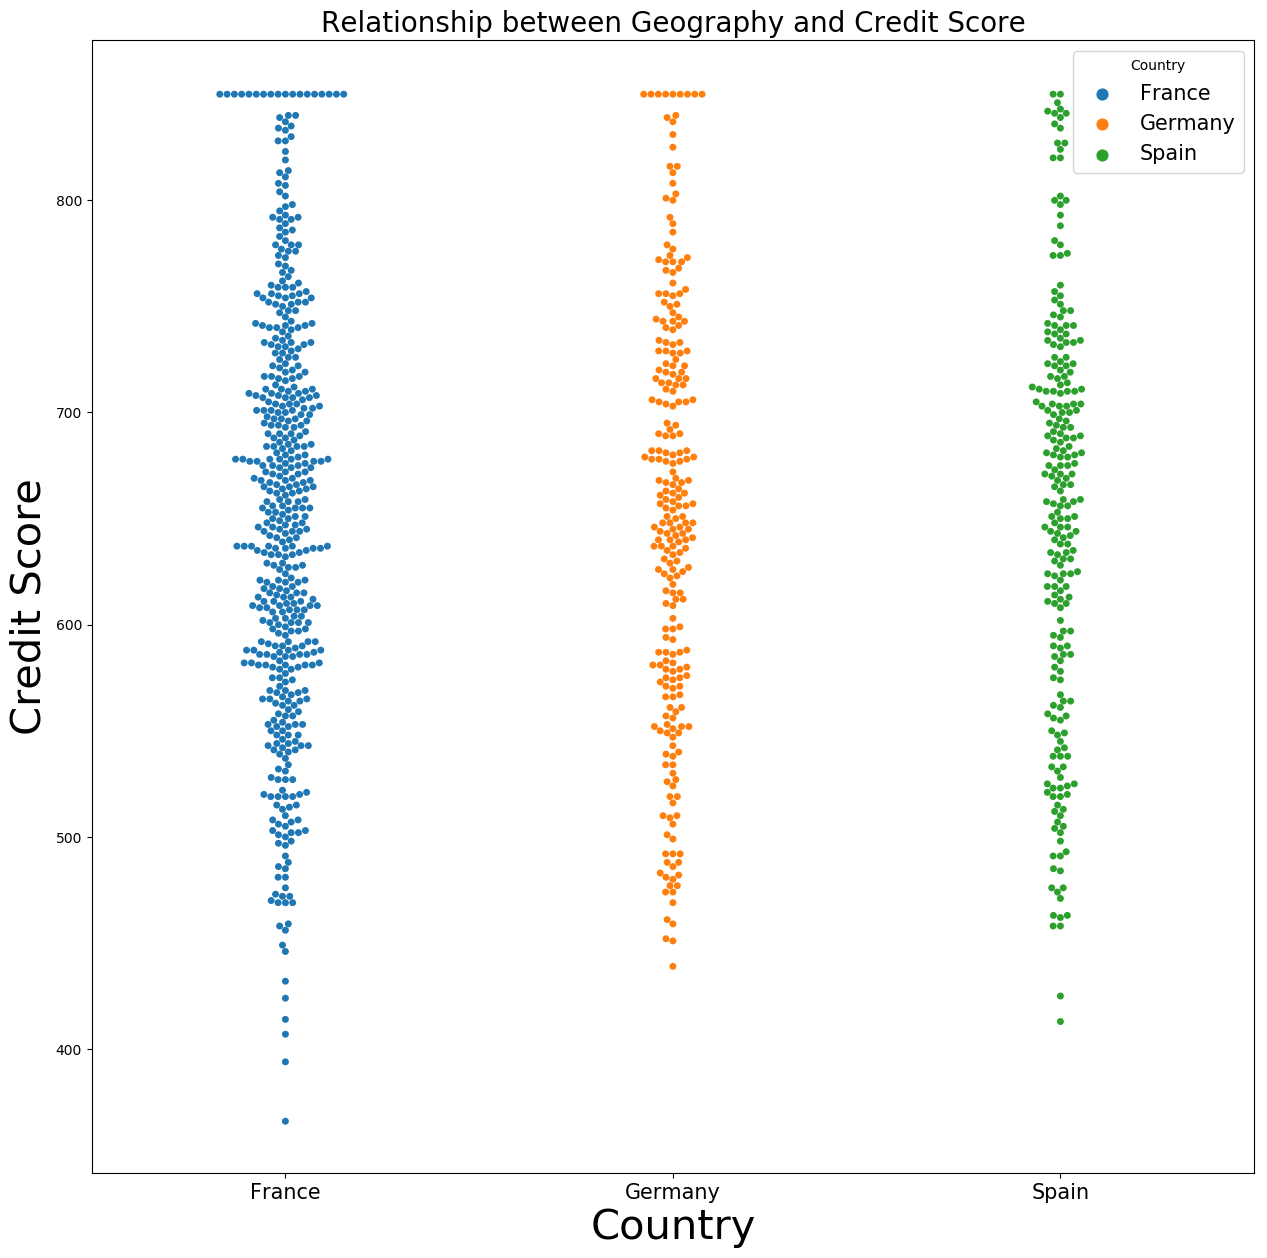

In [75]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,15), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Geography", y="CreditScore", hue="Geography", data=CustomerData)
ax.set_title("Relationship between Geography and Credit Score", fontsize=20)
ax.set_xlabel("Country", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Credit Score", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Country')

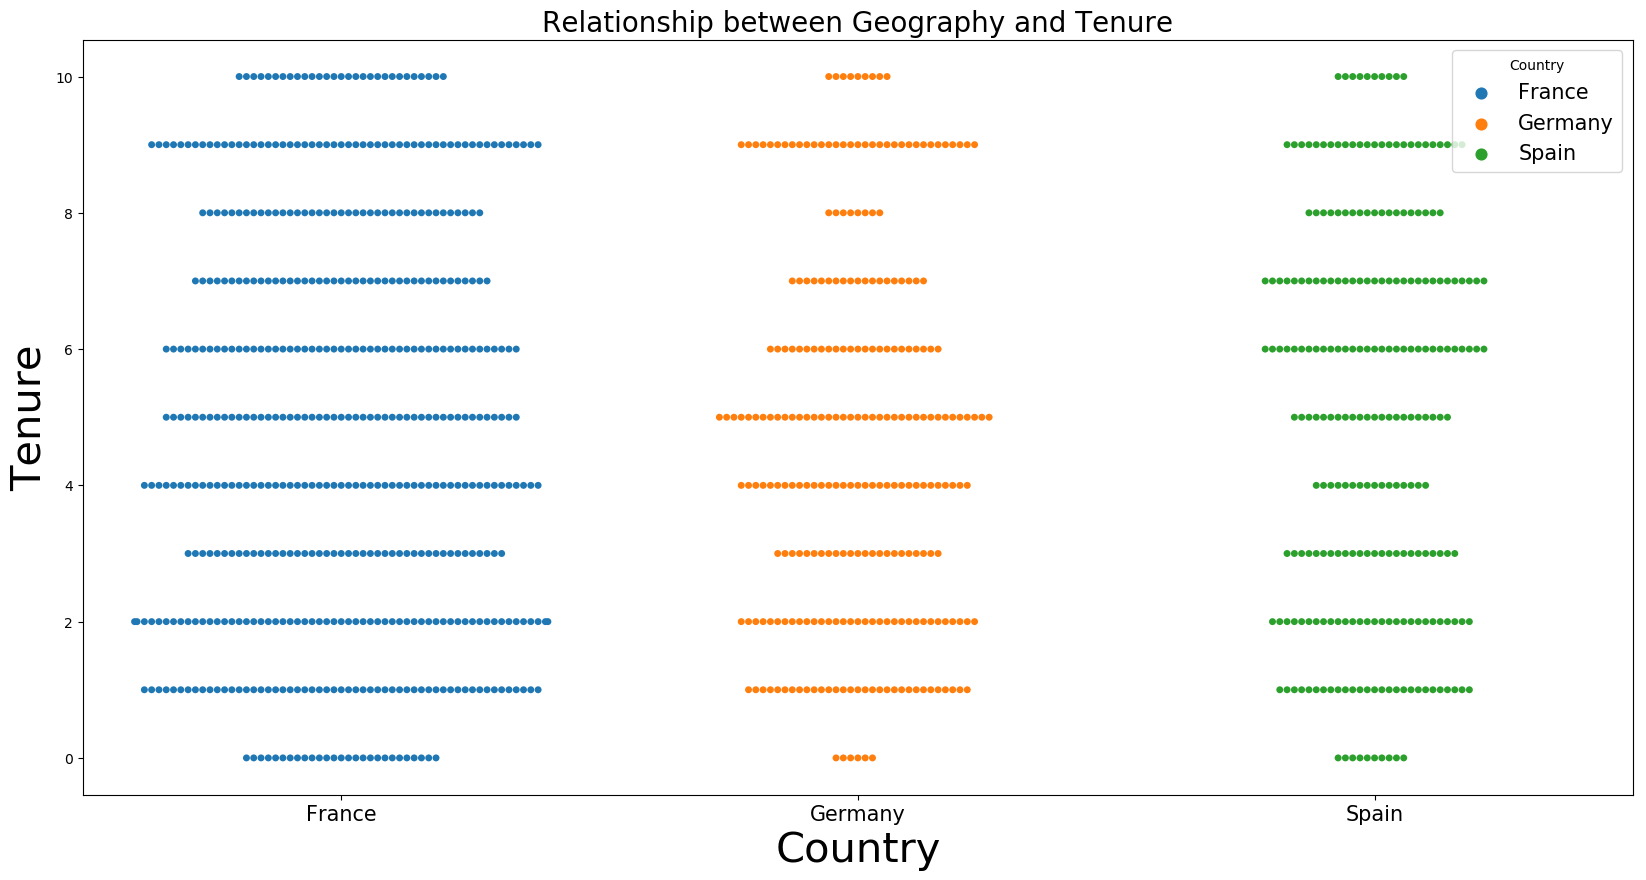

In [76]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Geography", y="Tenure", hue="Geography", data=CustomerData)
ax.set_title("Relationship between Geography and Tenure", fontsize=20)
ax.set_xlabel("Country", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Tenure", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Country')

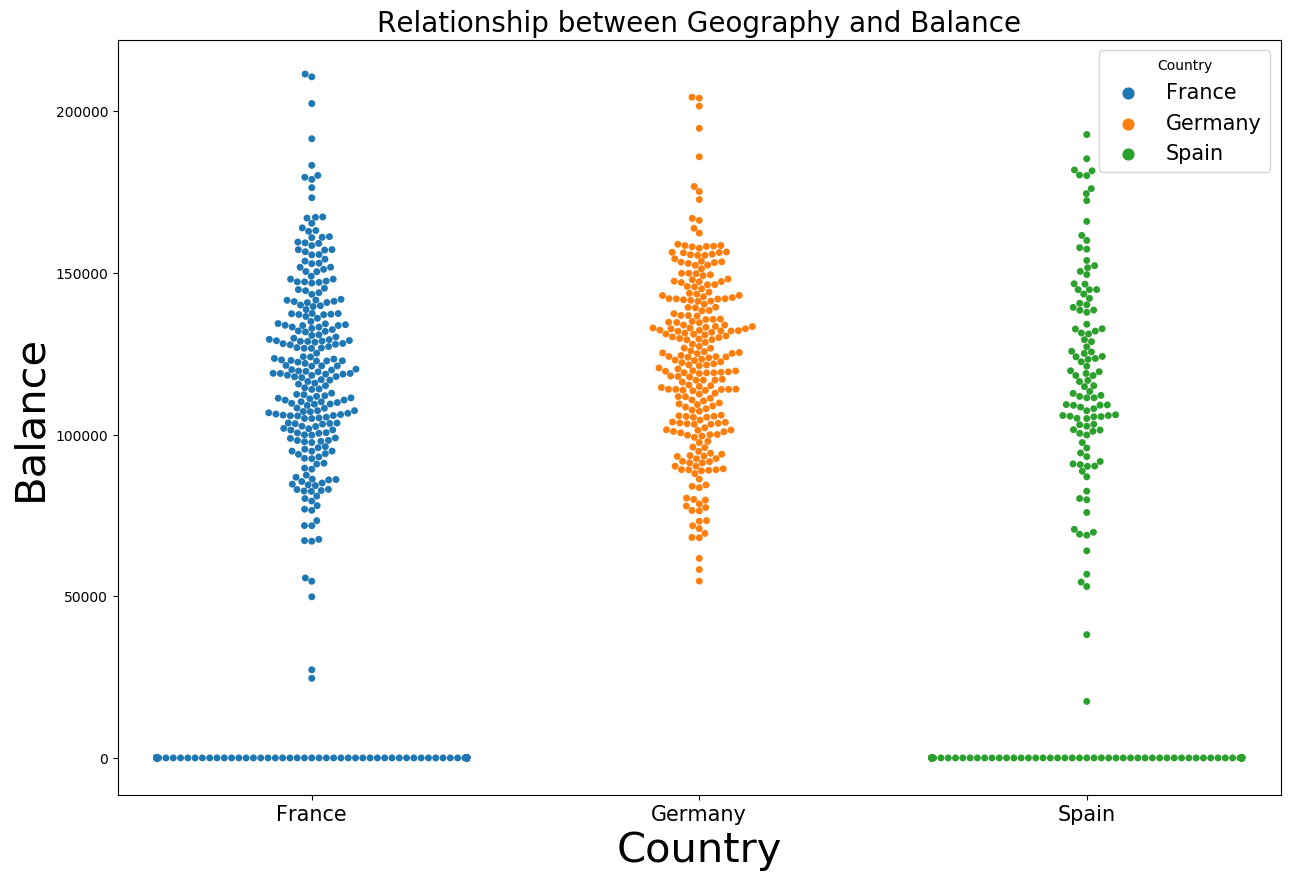

In [77]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Geography", y="Balance", hue="Geography", data=CustomerData)
ax.set_title("Relationship between Geography and Balance", fontsize=20)
ax.set_xlabel("Country", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Balance", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Country')

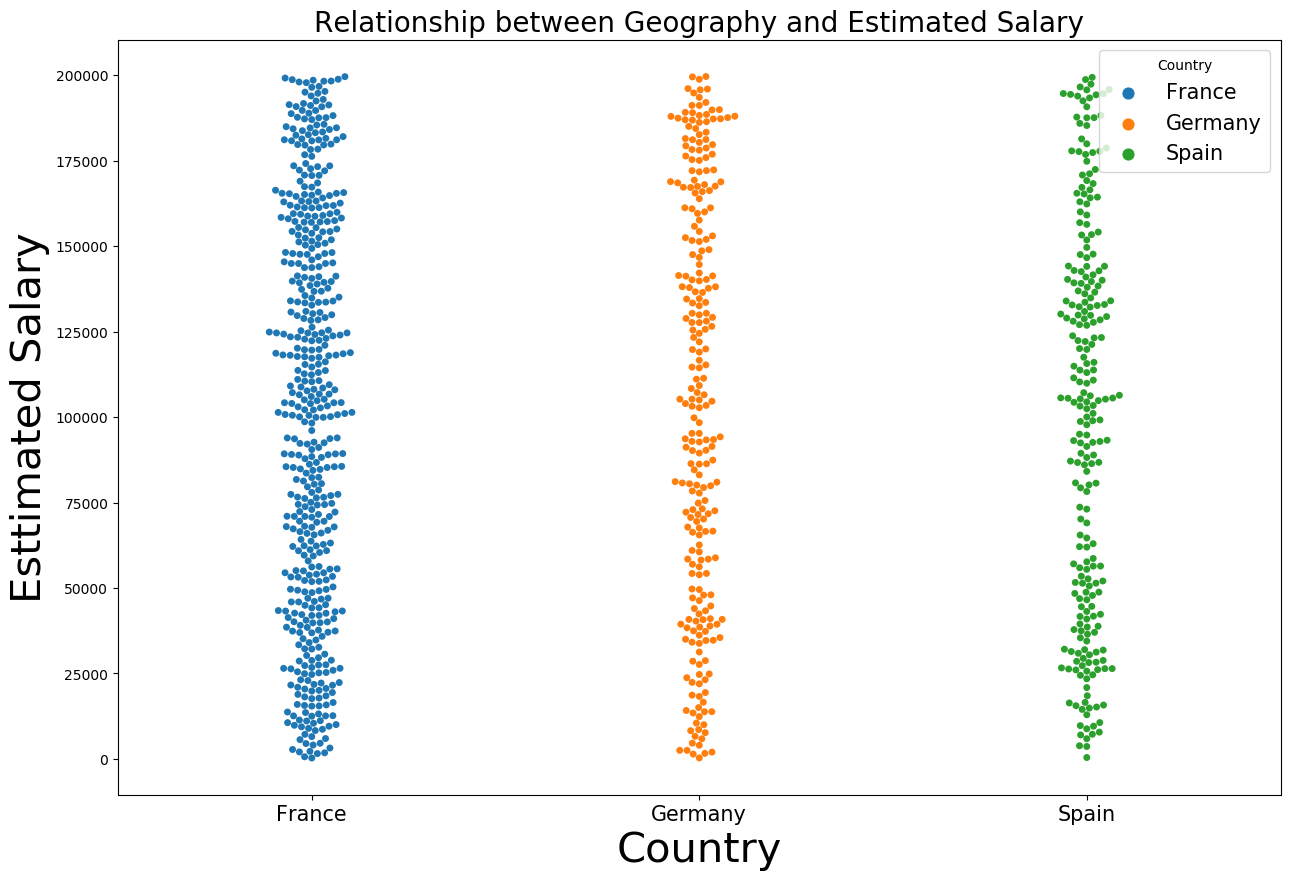

In [78]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Geography", y="EstimatedSalary", hue="Geography", data=CustomerData)
ax.set_title("Relationship between Geography and Estimated Salary", fontsize=20)
ax.set_xlabel("Country", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Esttimated Salary", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Country')

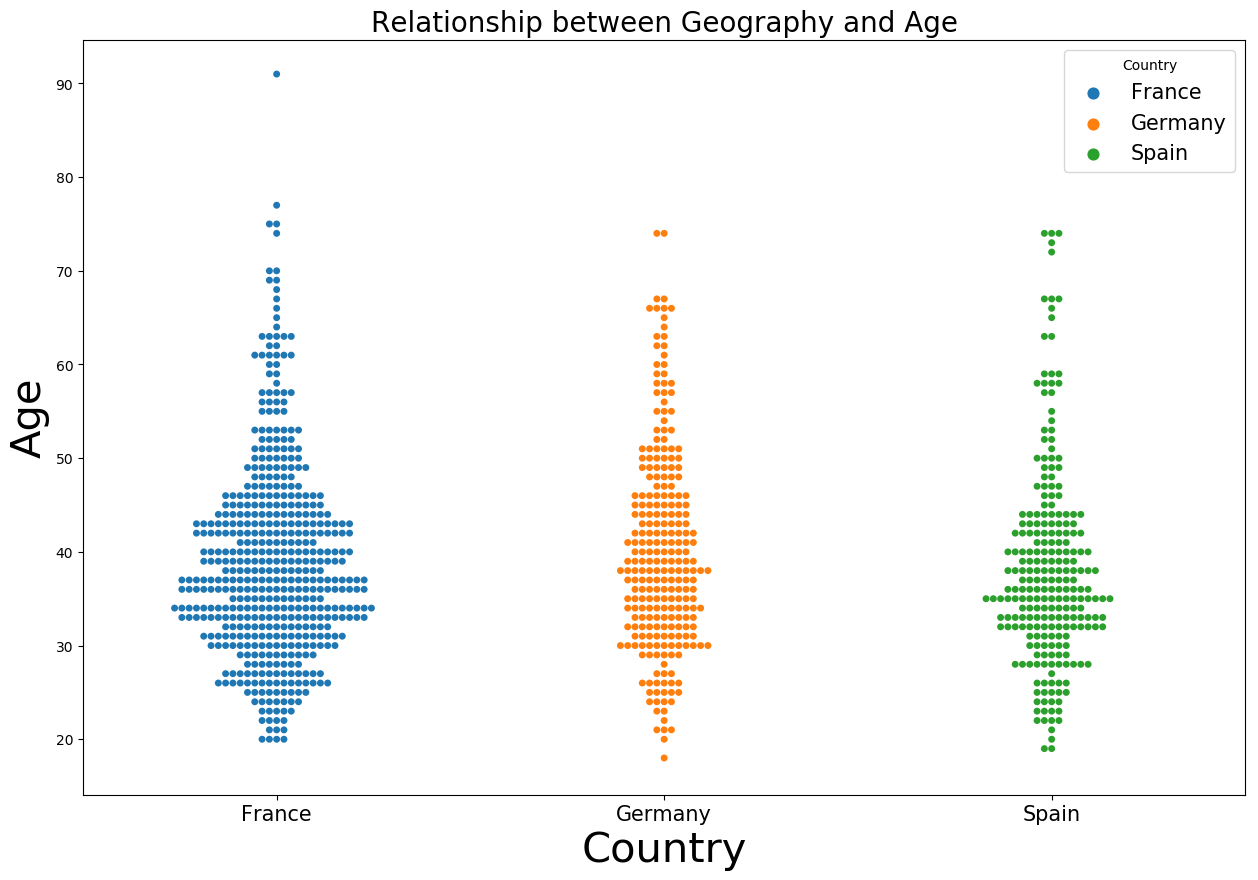

In [79]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Geography", y="Age", hue="Geography", data=CustomerData)
ax.set_title("Relationship between Geography and Age", fontsize=20)
ax.set_xlabel("Country", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Age", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Country')

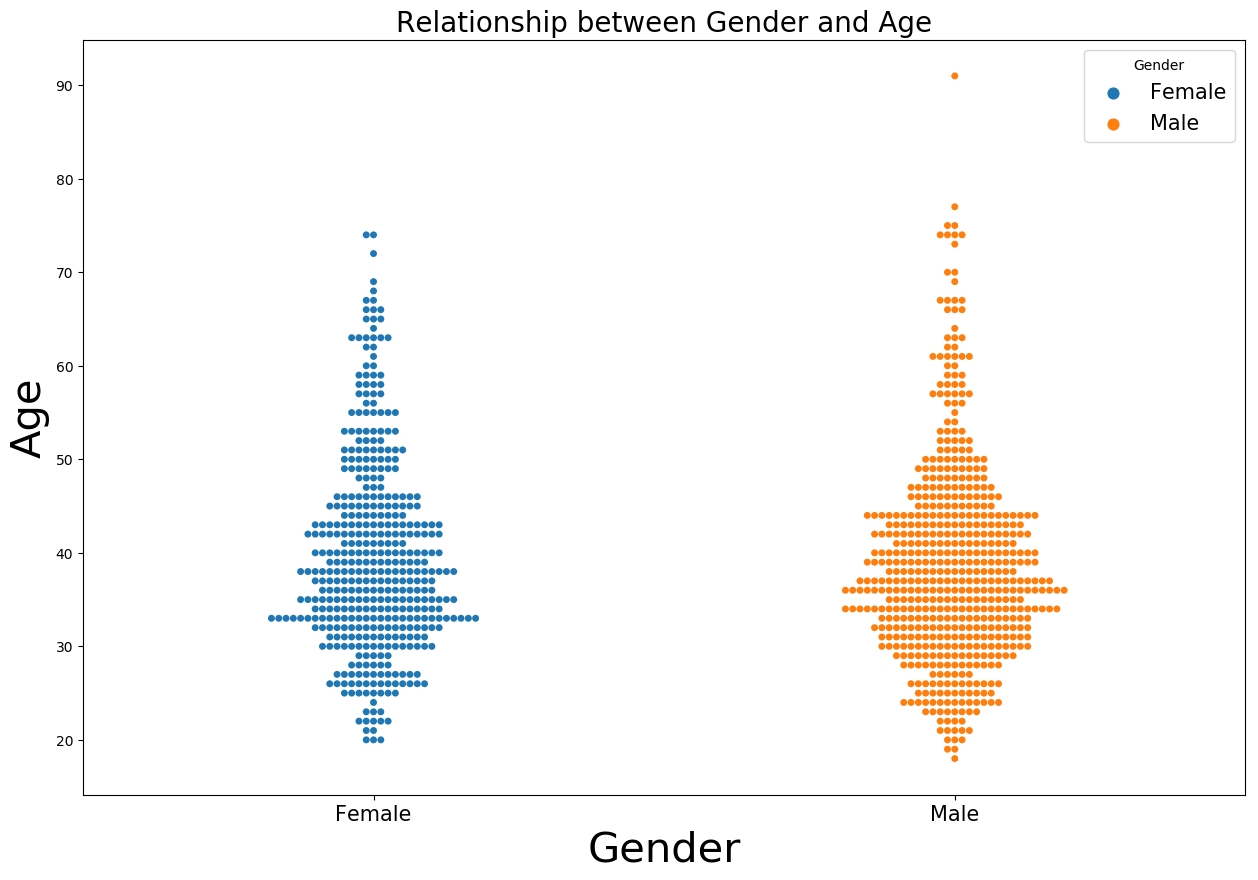

In [80]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Gender", y="Age", hue="Gender", data=CustomerData)
ax.set_title("Relationship between Gender and Age", fontsize=20)
ax.set_xlabel("Gender", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Age", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Gender')

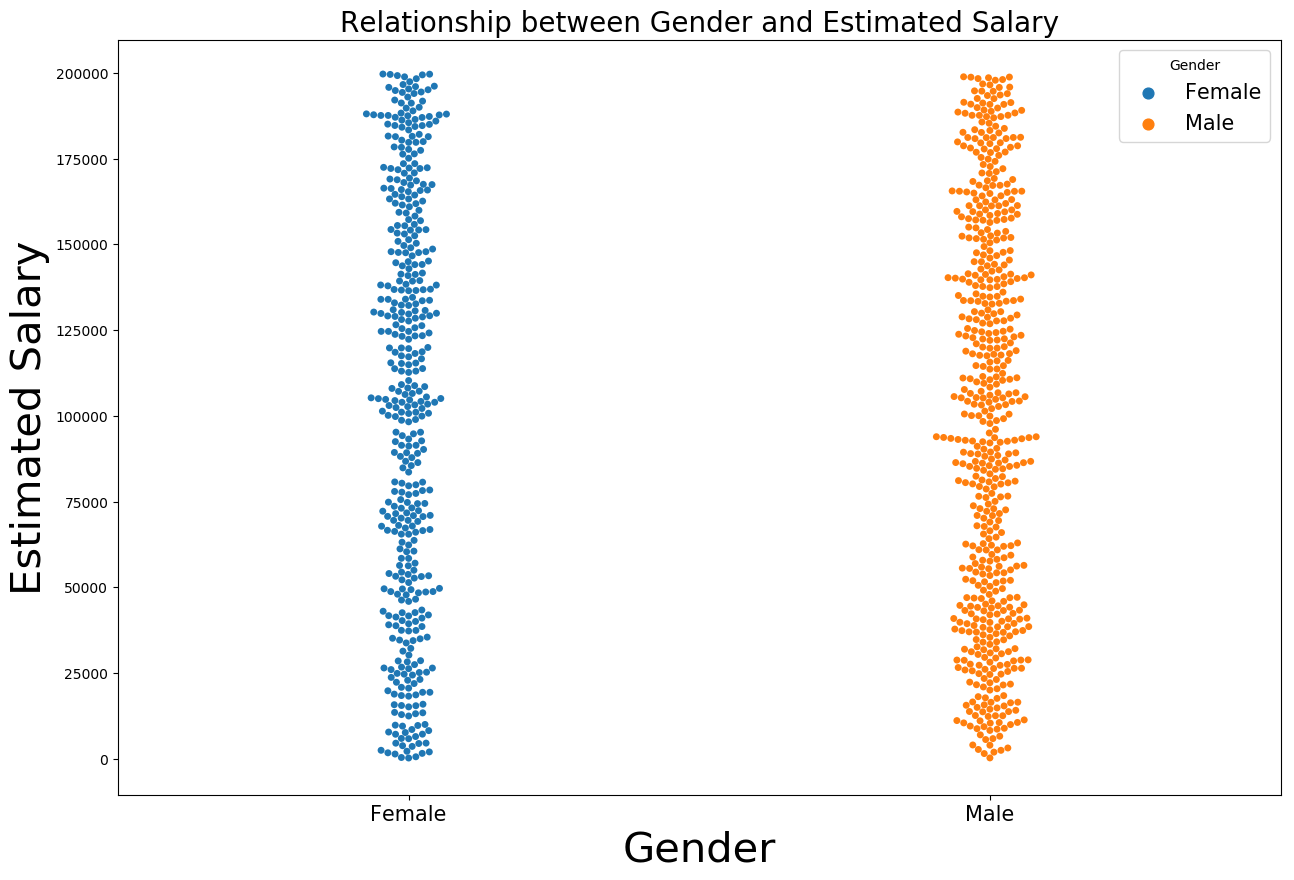

In [81]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Gender", y="EstimatedSalary", hue="Gender", data=CustomerData)
ax.set_title("Relationship between Gender and Estimated Salary", fontsize=20)
ax.set_xlabel("Gender", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Estimated Salary", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Gender')

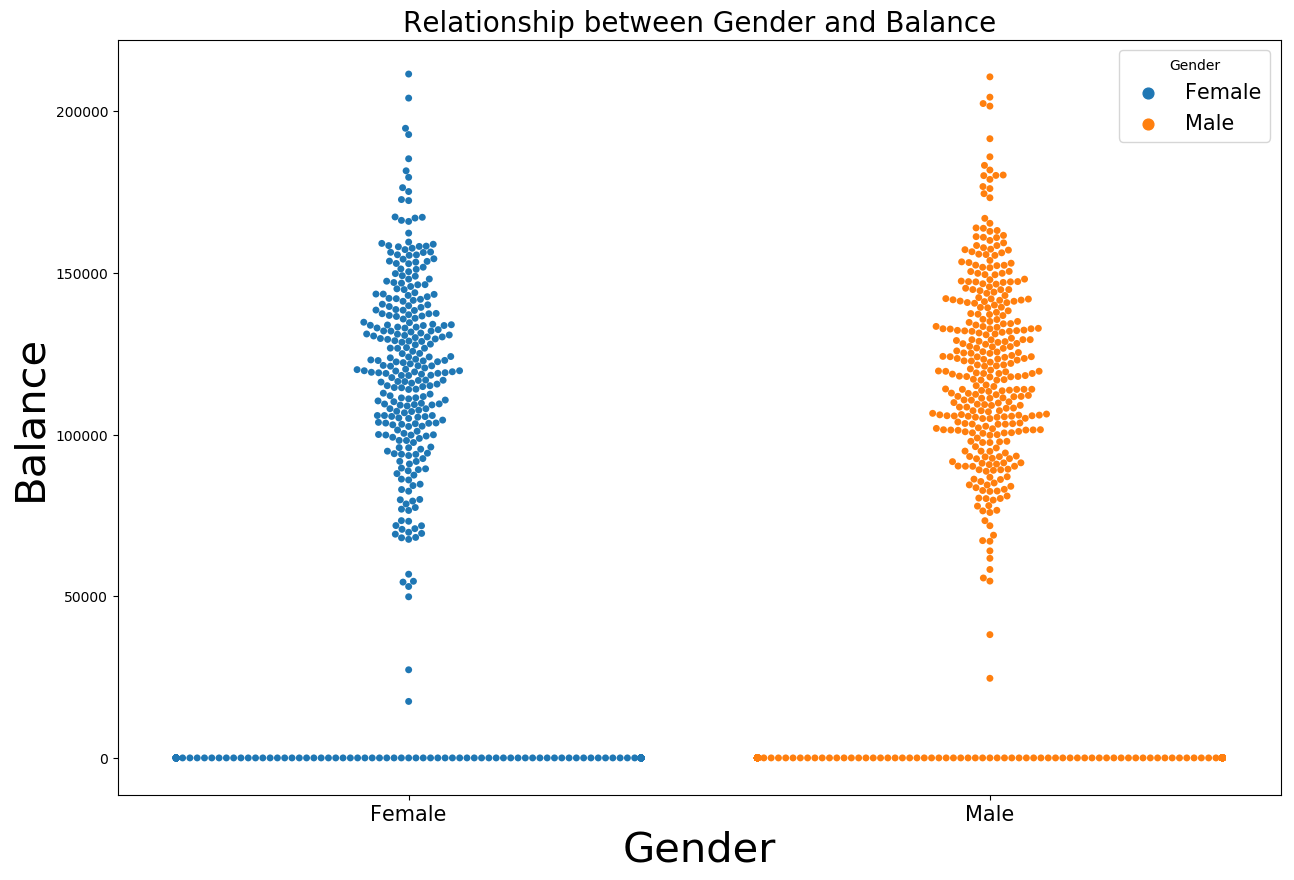

In [82]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Gender", y="Balance", hue="Gender", data=CustomerData)
ax.set_title("Relationship between Gender and Balance", fontsize=20)
ax.set_xlabel("Gender", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Balance", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Gender')

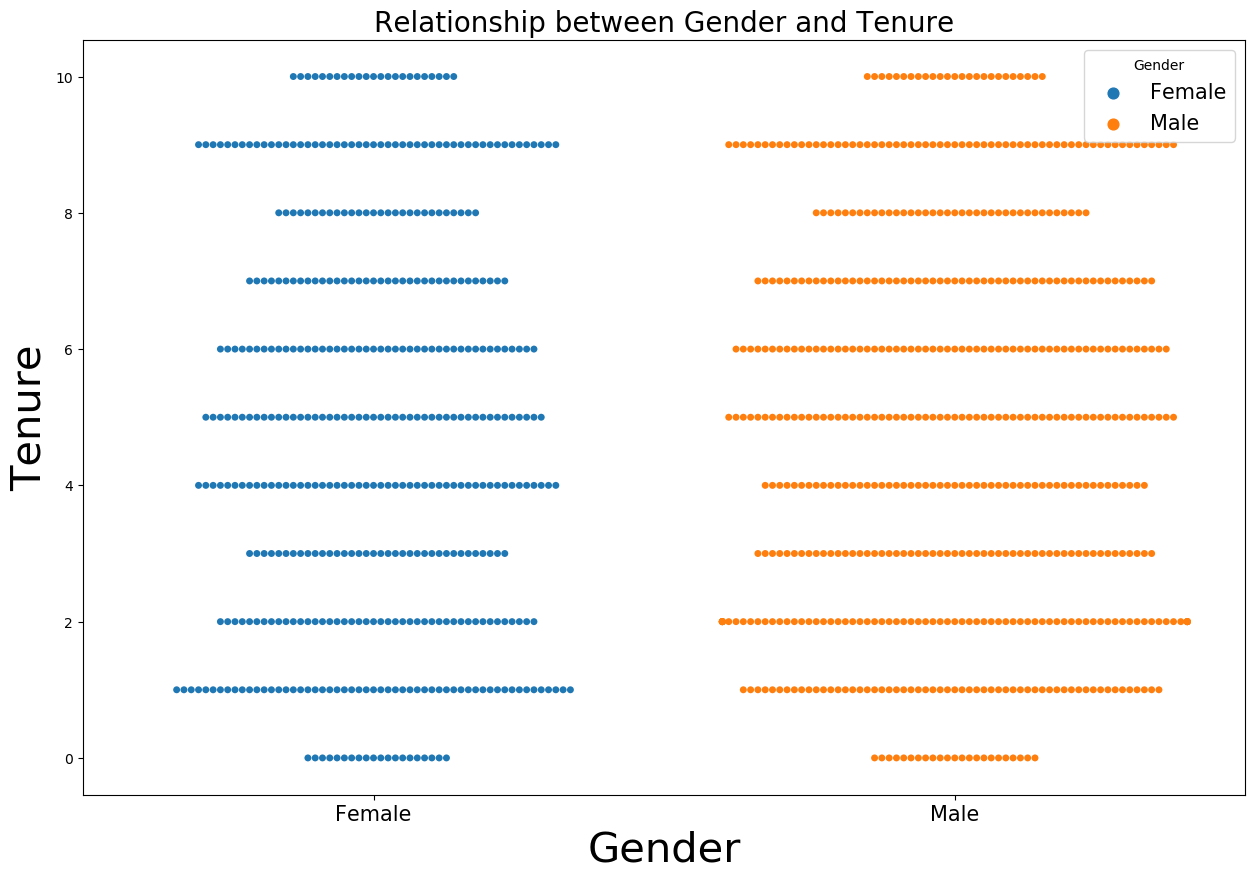

In [83]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Gender", y="Tenure", hue="Gender", data=CustomerData)
ax.set_title("Relationship between Gender and Tenure", fontsize=20)
ax.set_xlabel("Gender", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Tenure", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Gender')

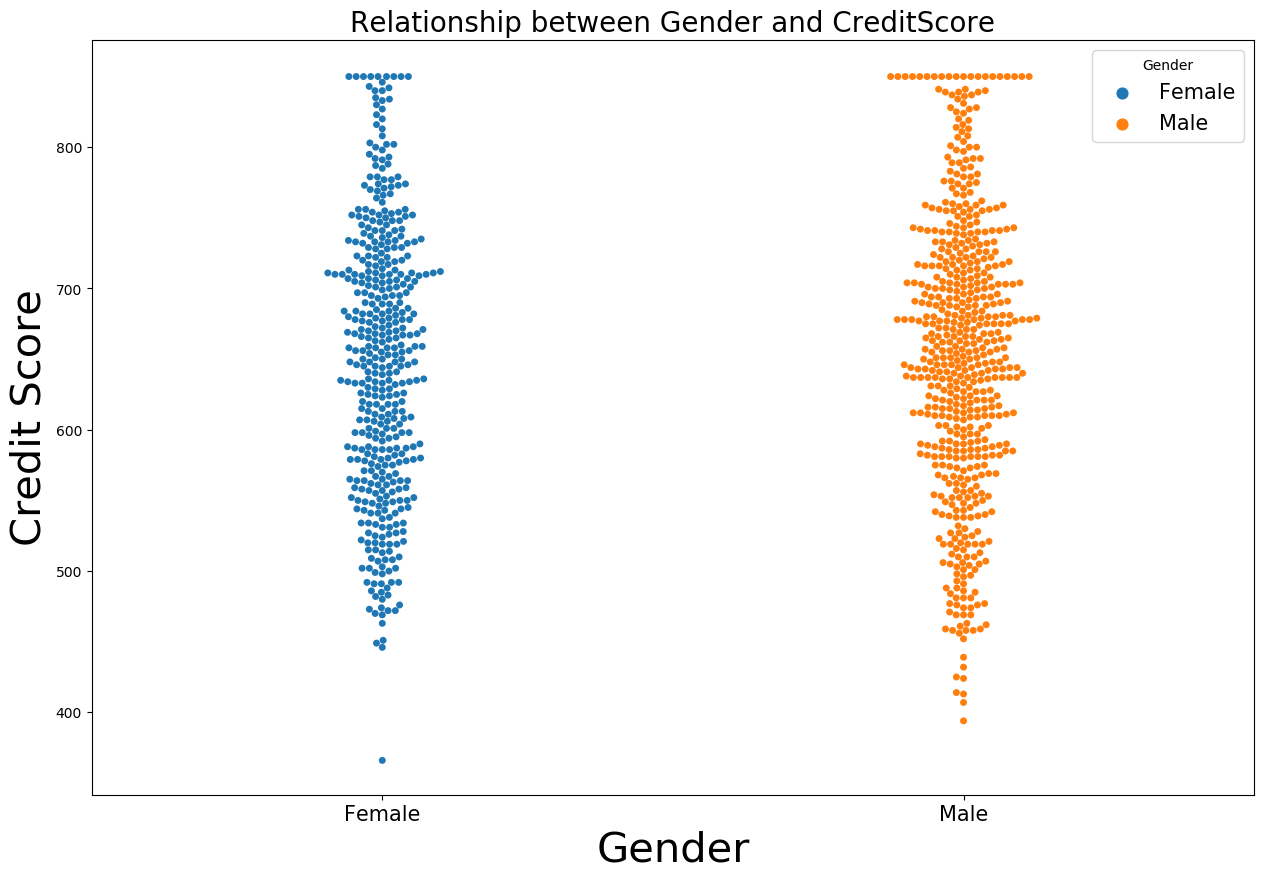

In [84]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(15,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="Gender", y="CreditScore", hue="Gender", data=CustomerData)
ax.set_title("Relationship between Gender and CreditScore", fontsize=20)
ax.set_xlabel("Gender", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Credit Score", fontsize=30)
ax.legend(loc=1,fontsize=15,title='Gender')

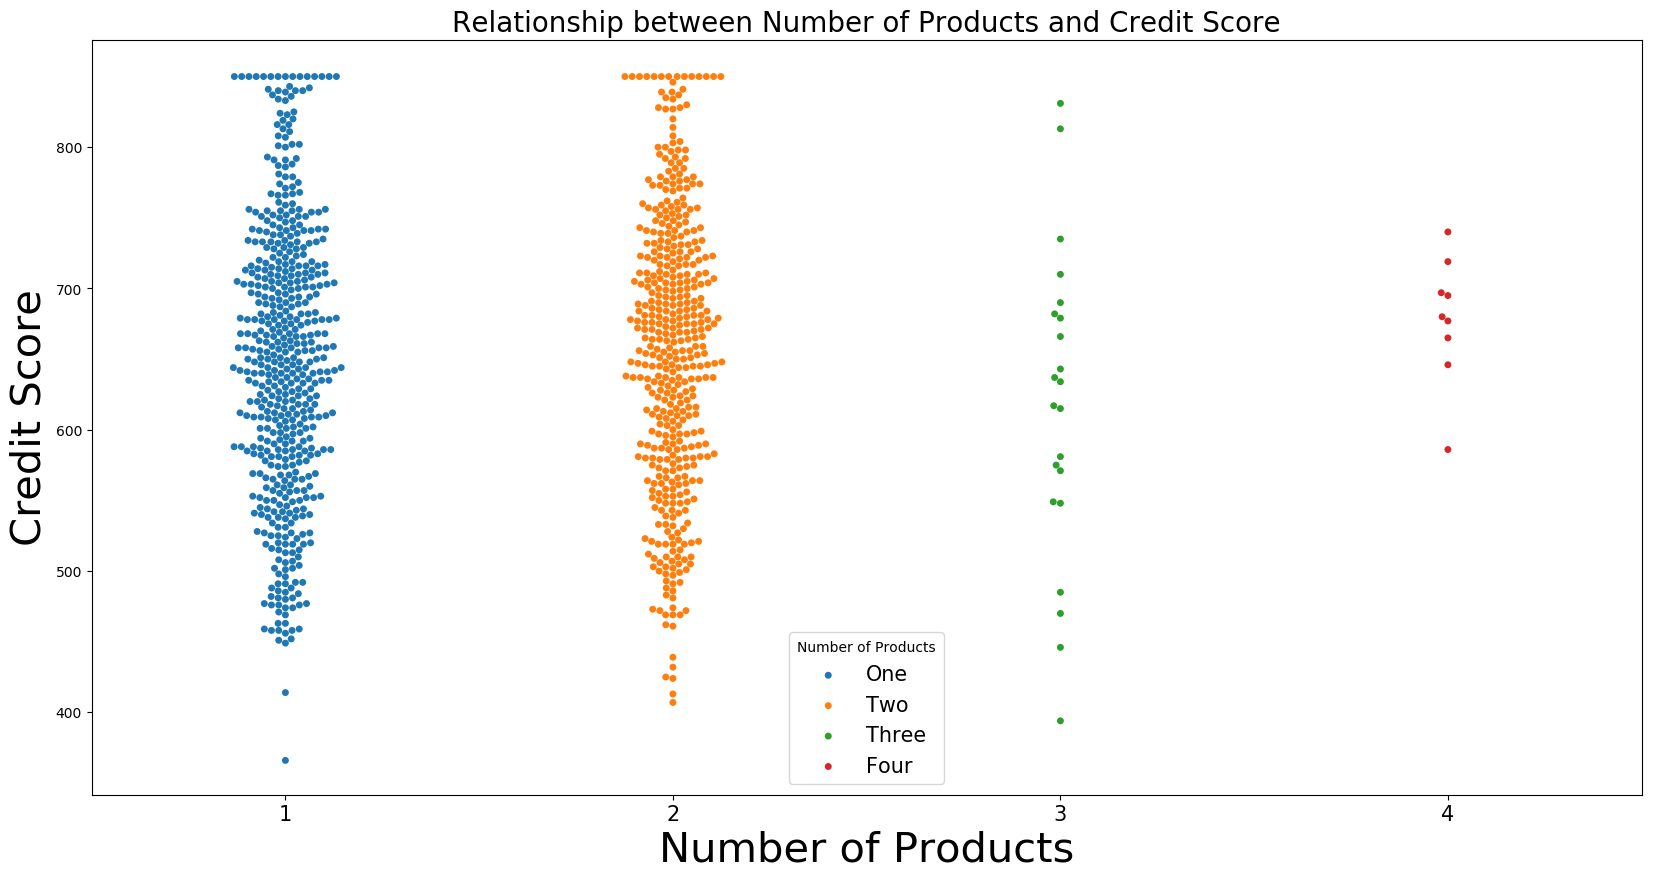

In [85]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="NumOfProducts", y="CreditScore", hue="NumOfProducts", data=CustomerData)
ax.set_title("Relationship between Number of Products and Credit Score", fontsize=20)
ax.set_xlabel("Number of Products", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Credit Score", fontsize=30)
ax.legend(["One","Two","Three","Four"],loc=8,fontsize=15,title='Number of Products')

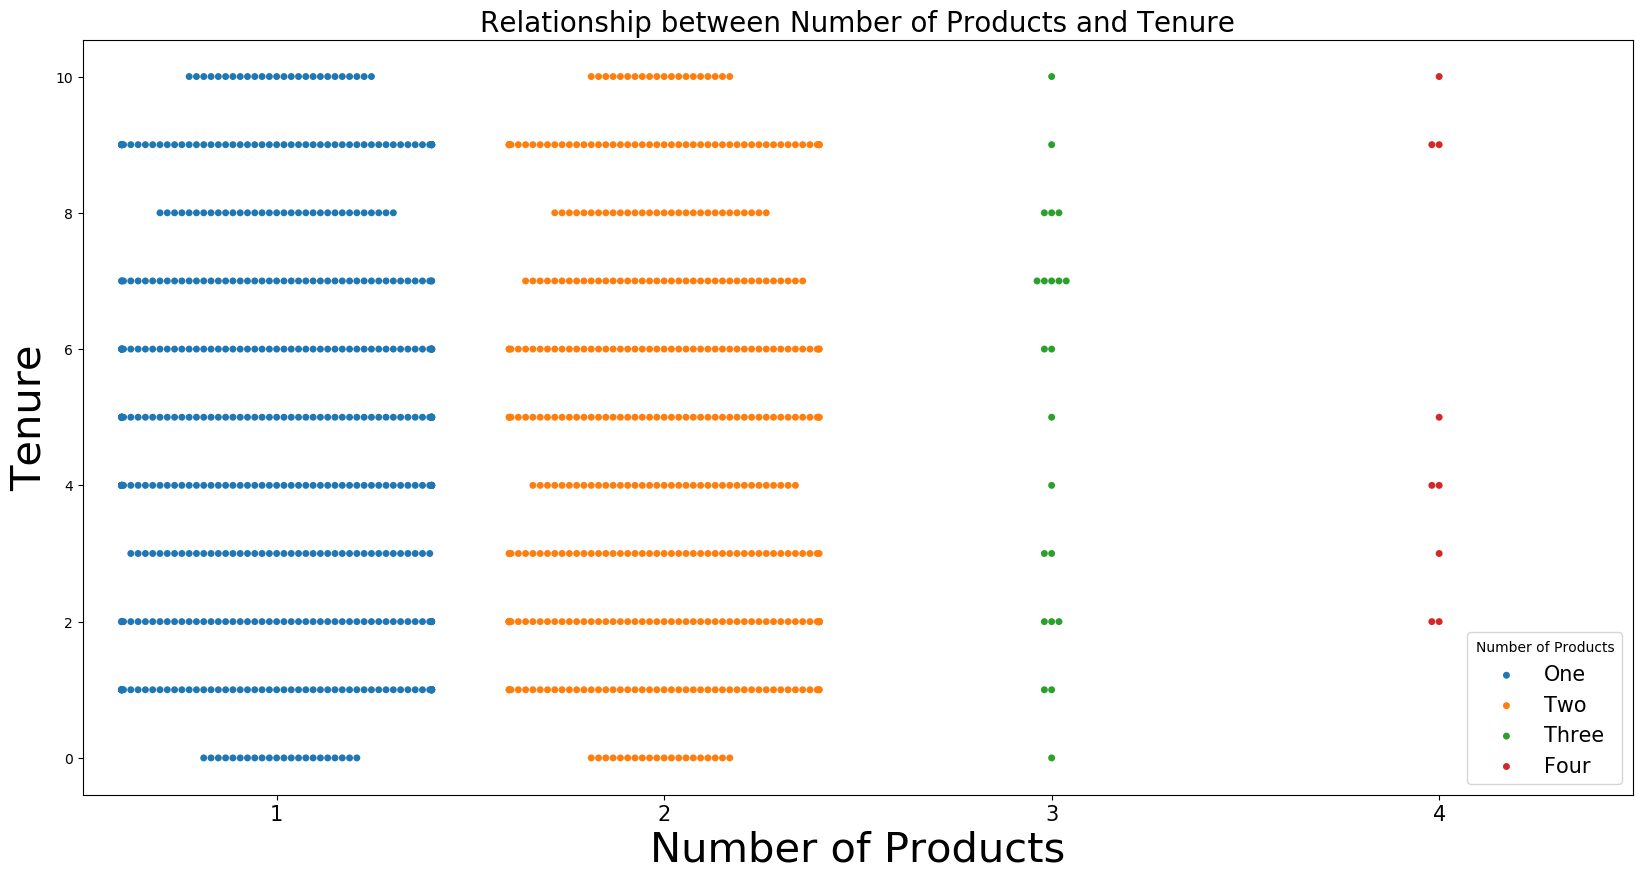

In [86]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="NumOfProducts", y="Tenure", hue="NumOfProducts", data=CustomerData)
ax.set_title("Relationship between Number of Products and Tenure", fontsize=20)
ax.set_xlabel("Number of Products", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Tenure", fontsize=30)
ax.legend(["One","Two","Three","Four"],loc=4,fontsize=15,title='Number of Products')

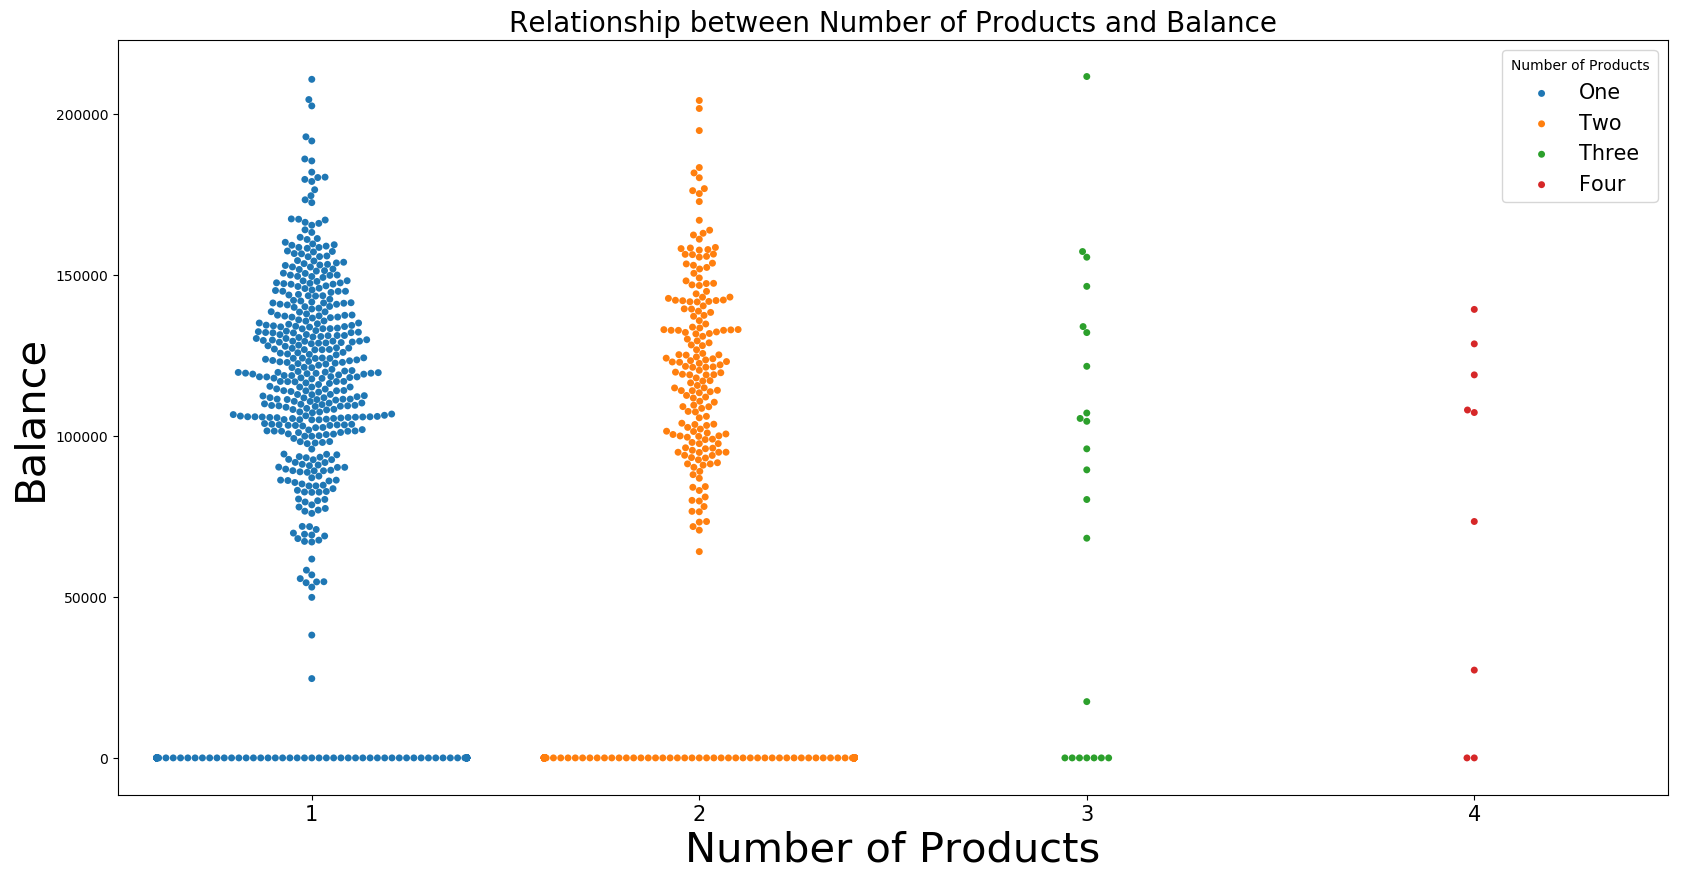

In [87]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="NumOfProducts", y="Balance", hue="NumOfProducts", data=CustomerData)
ax.set_title("Relationship between Number of Products and Balance", fontsize=20)
ax.set_xlabel("Number of Products", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Balance", fontsize=30)
ax.legend(["One","Two","Three","Four"],loc=1,fontsize=15,title='Number of Products')

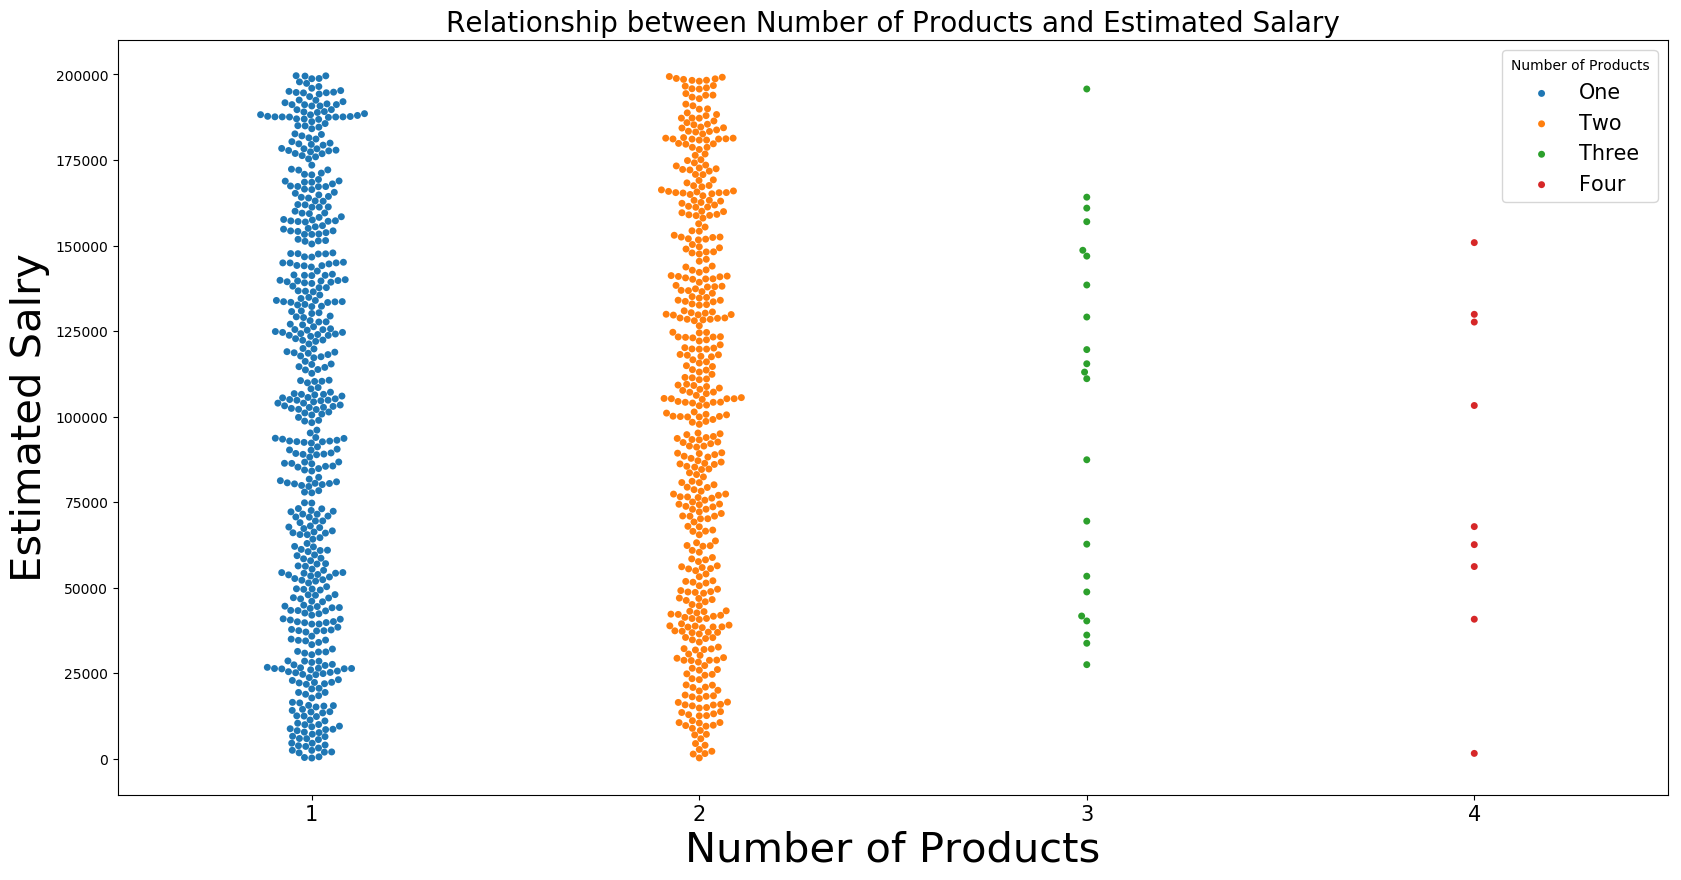

In [88]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="NumOfProducts", y="EstimatedSalary", hue="NumOfProducts", data=CustomerData)
ax.set_title("Relationship between Number of Products and Estimated Salary", fontsize=20)
ax.set_xlabel("Number of Products", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Estimated Salry", fontsize=30)
ax.legend(["One","Two","Three","Four"],loc=1,fontsize=15,title='Number of Products')

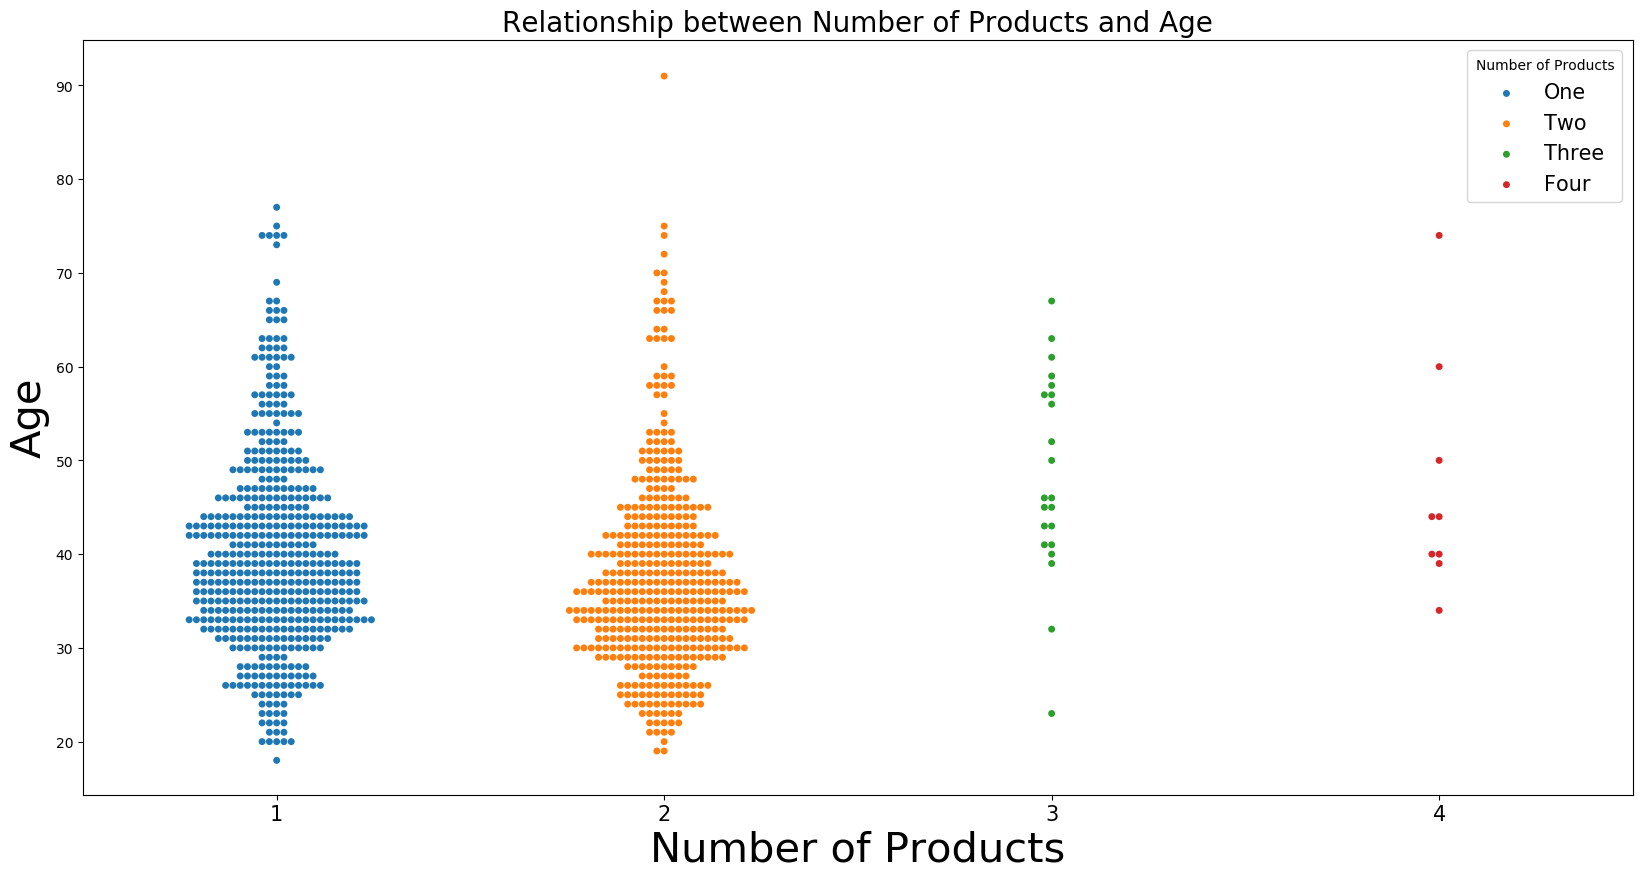

In [89]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="NumOfProducts", y="Age", hue="NumOfProducts", data=CustomerData)
ax.set_title("Relationship between Number of Products and Age", fontsize=20)
ax.set_xlabel("Number of Products", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Age", fontsize=30)
ax.legend(["One","Two","Three","Four"],loc=1,fontsize=15,title='Number of Products')

[Text(0,0,'No'), Text(0,0,'Yes')]

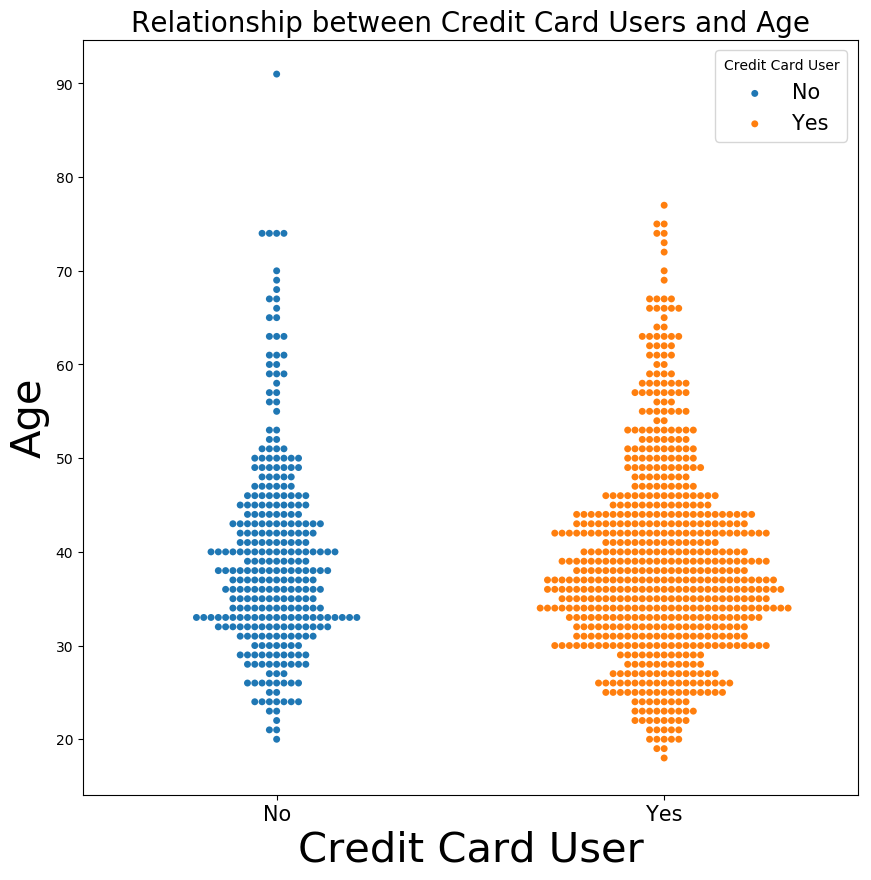

In [90]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="HasCrCard", y="Age", hue="HasCrCard", data=CustomerData)
ax.set_title("Relationship between Credit Card Users and Age", fontsize=20)
ax.set_xlabel("Credit Card User", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Age", fontsize=30)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Credit Card User')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

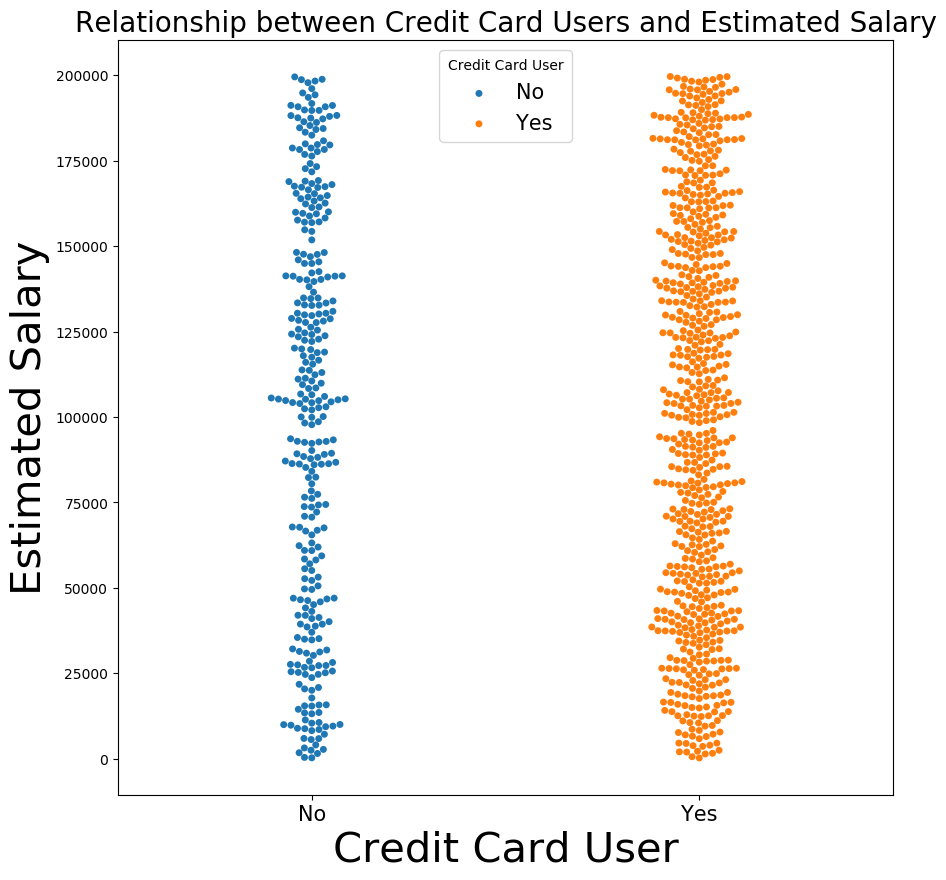

In [91]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="HasCrCard", y="EstimatedSalary", hue="HasCrCard", data=CustomerData)
ax.set_title("Relationship between Credit Card Users and Estimated Salary", fontsize=20)
ax.set_xlabel("Credit Card User", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Estimated Salary", fontsize=30)
ax.legend(["No","Yes"],loc=9,fontsize=15,title='Credit Card User')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

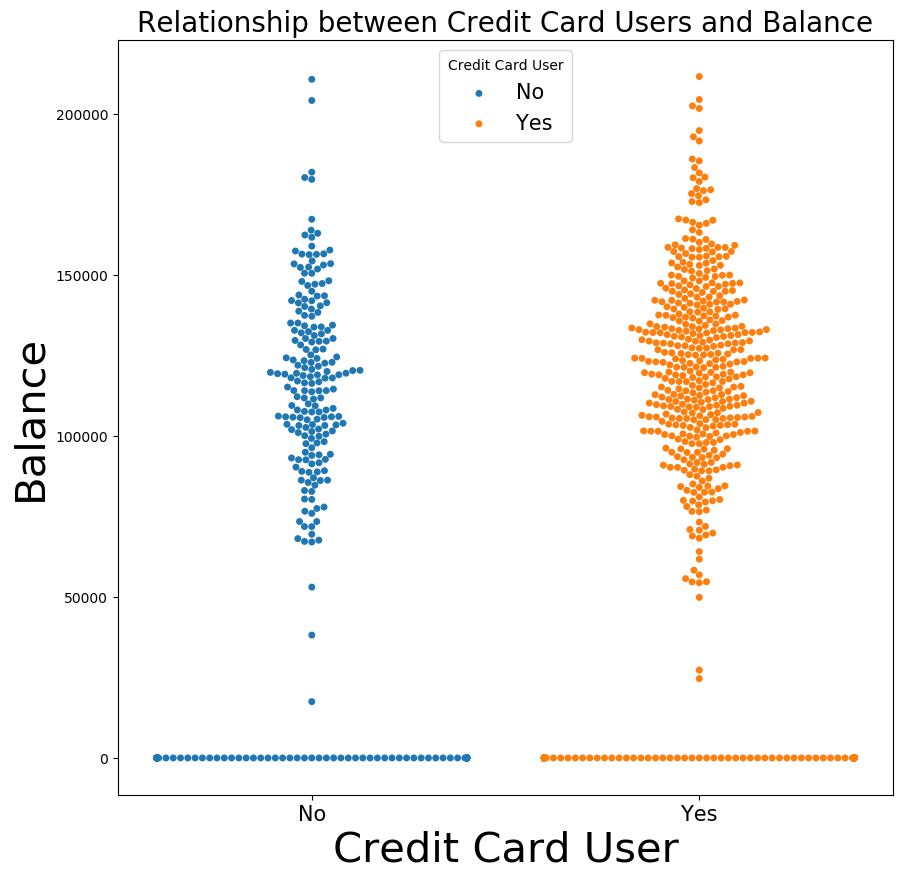

In [92]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="HasCrCard", y="Balance", hue="HasCrCard", data=CustomerData)
ax.set_title("Relationship between Credit Card Users and Balance", fontsize=20)
ax.set_xlabel("Credit Card User", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Balance", fontsize=30)
ax.legend(["No","Yes"],loc=9,fontsize=15,title='Credit Card User')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

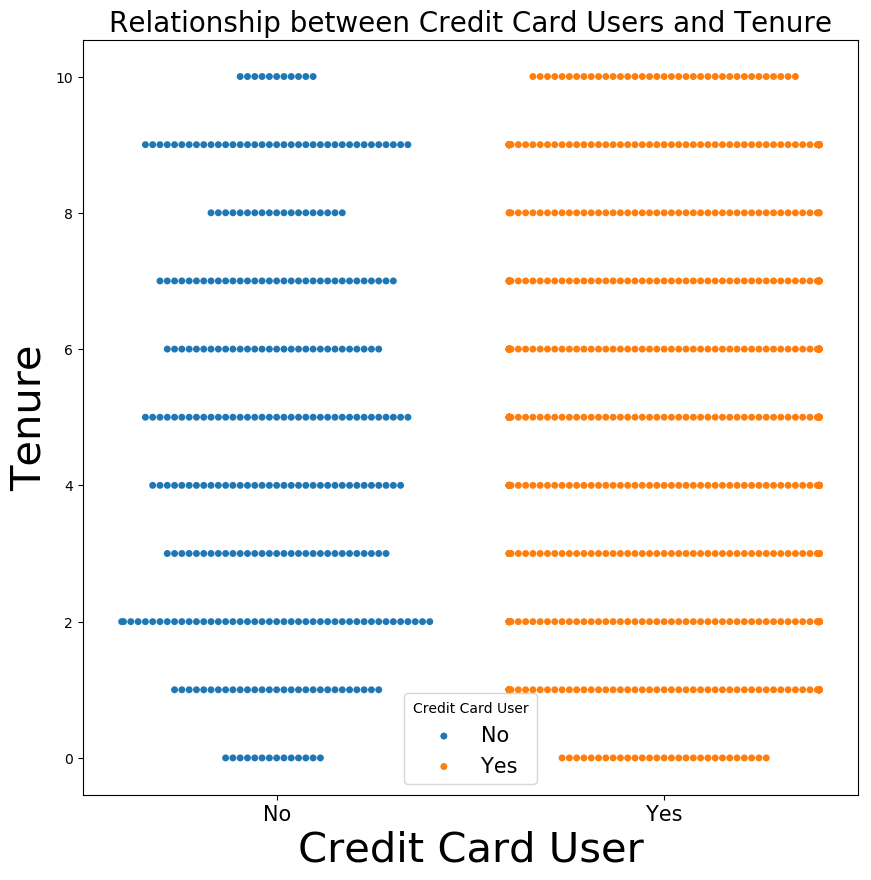

In [93]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="HasCrCard", y="Tenure", hue="HasCrCard", data=CustomerData)
ax.set_title("Relationship between Credit Card Users and Tenure", fontsize=20)
ax.set_xlabel("Credit Card User", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Tenure", fontsize=30)
ax.legend(["No","Yes"],loc=8,fontsize=15,title='Credit Card User')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

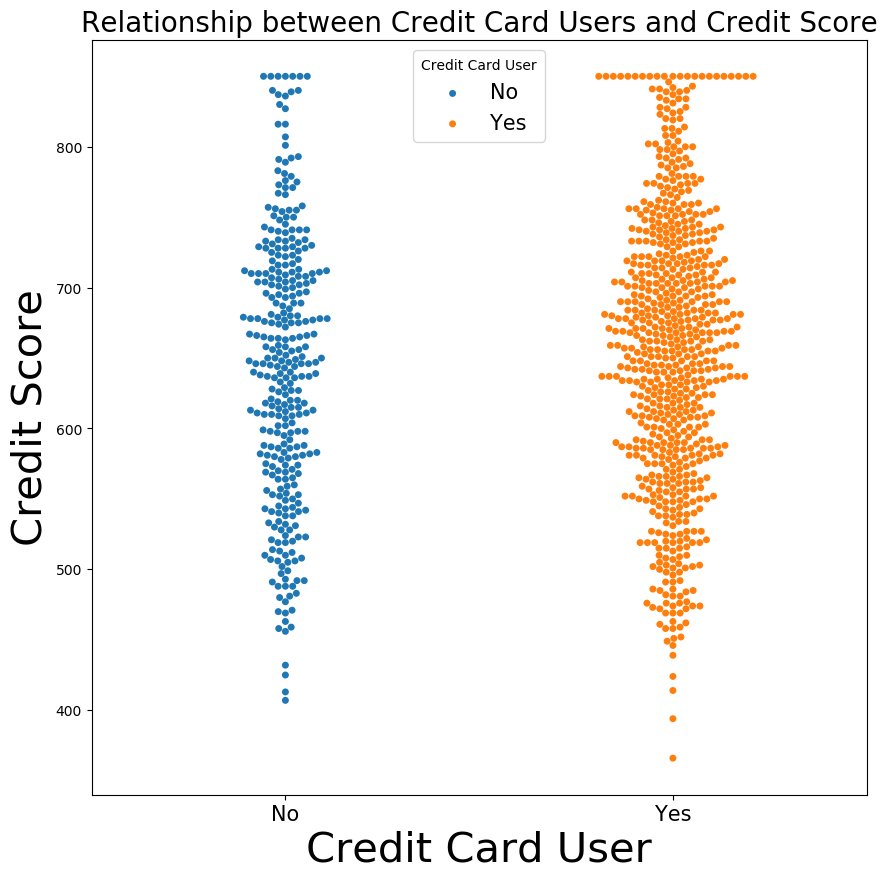

In [94]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="HasCrCard", y="CreditScore", hue="HasCrCard", data=CustomerData)
ax.set_title("Relationship between Credit Card Users and Credit Score", fontsize=20)
ax.set_xlabel("Credit Card User", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Credit Score", fontsize=30)
ax.legend(["No","Yes"],loc=9,fontsize=15,title='Credit Card User')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

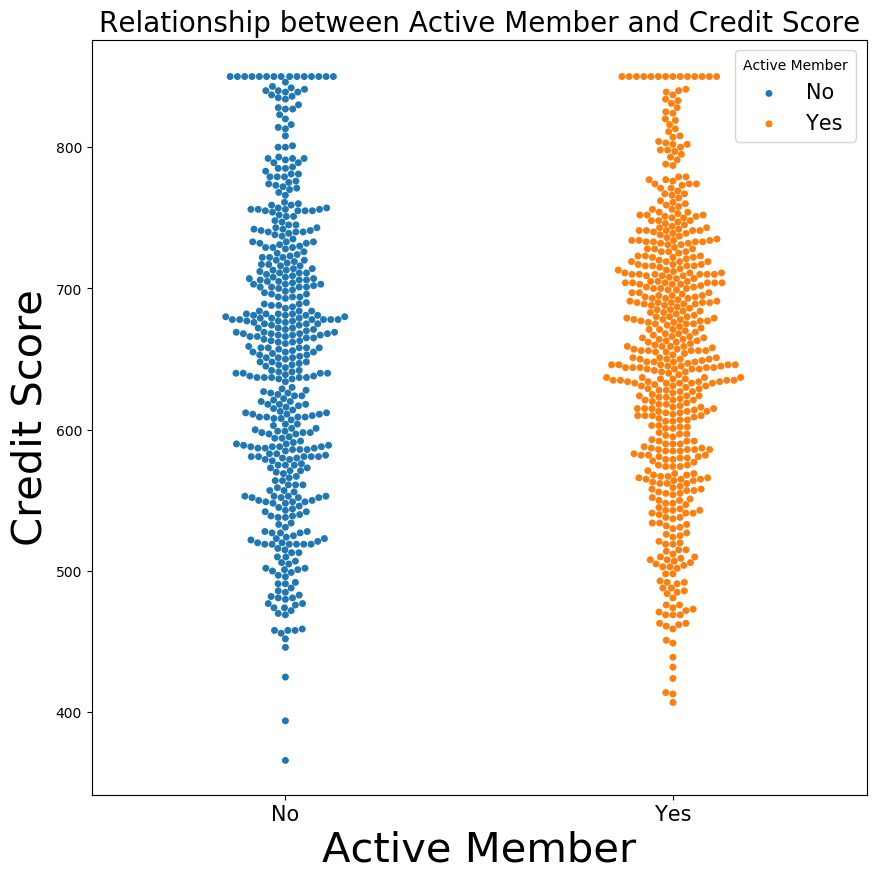

In [95]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="IsActiveMember", y="CreditScore", hue="IsActiveMember", data=CustomerData)
ax.set_title("Relationship between Active Member and Credit Score", fontsize=20)
ax.set_xlabel("Active Member", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Credit Score", fontsize=30)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Active Member')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

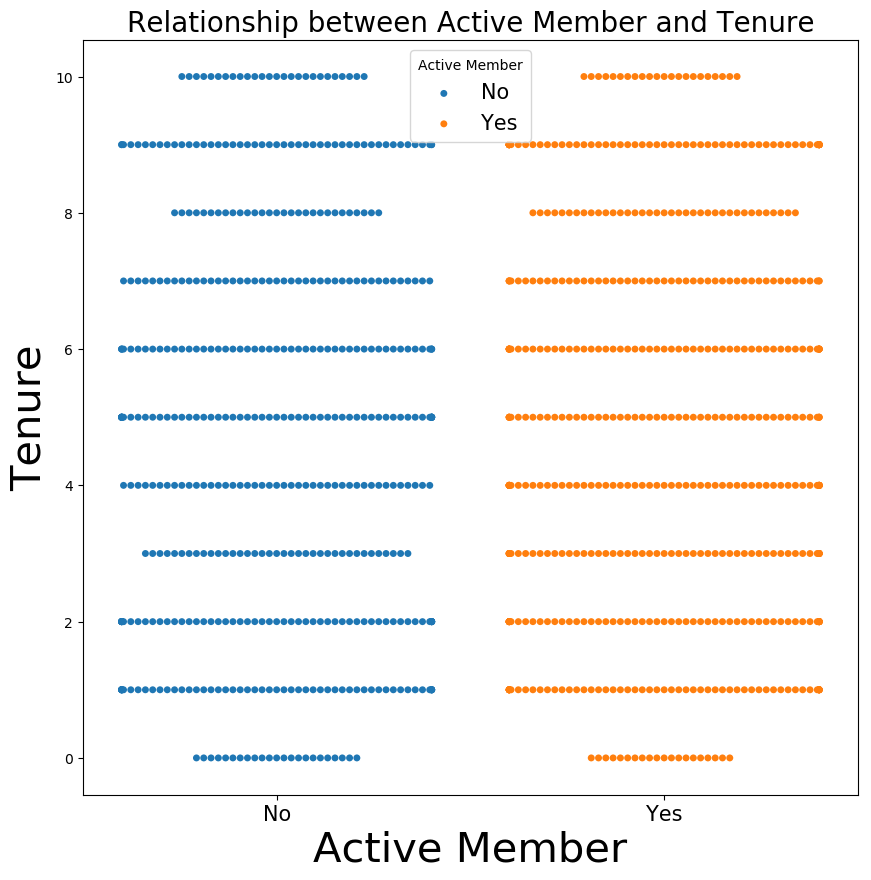

In [96]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="IsActiveMember", y="Tenure", hue="IsActiveMember", data=CustomerData)
ax.set_title("Relationship between Active Member and Tenure", fontsize=20)
ax.set_xlabel("Active Member", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Tenure", fontsize=30)
ax.legend(["No","Yes"],loc=9,fontsize=15,title='Active Member')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

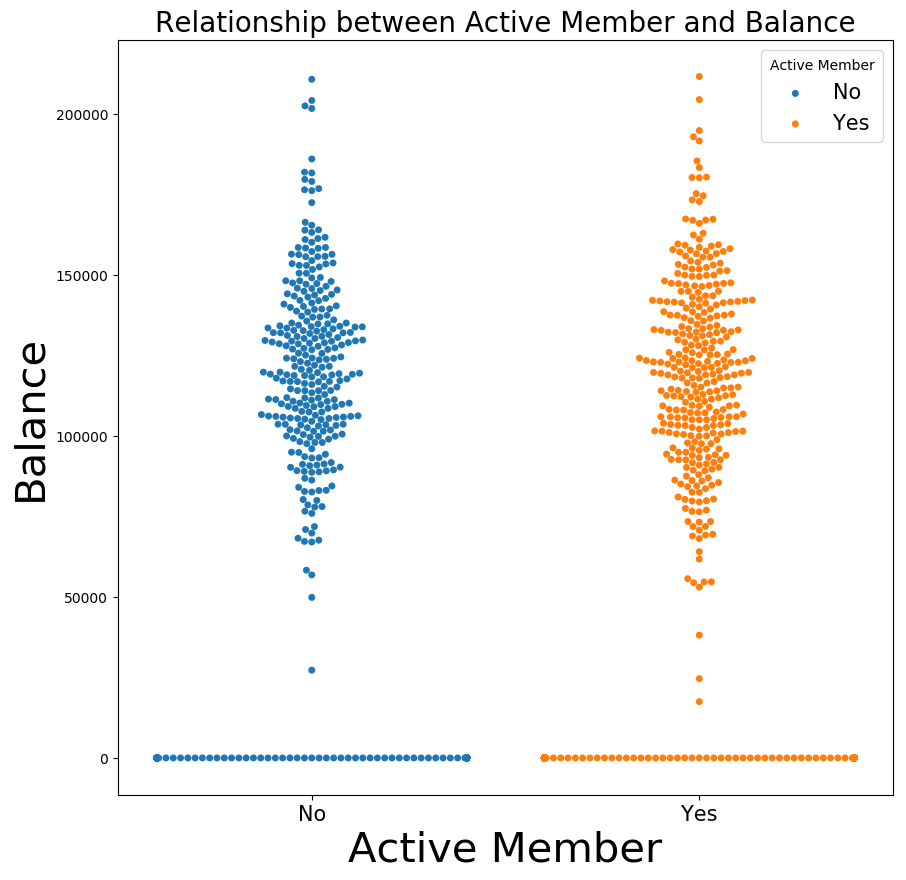

In [97]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="IsActiveMember", y="Balance", hue="IsActiveMember", data=CustomerData)
ax.set_title("Relationship between Active Member and Balance", fontsize=20)
ax.set_xlabel("Active Member", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Balance", fontsize=30)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Active Member')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

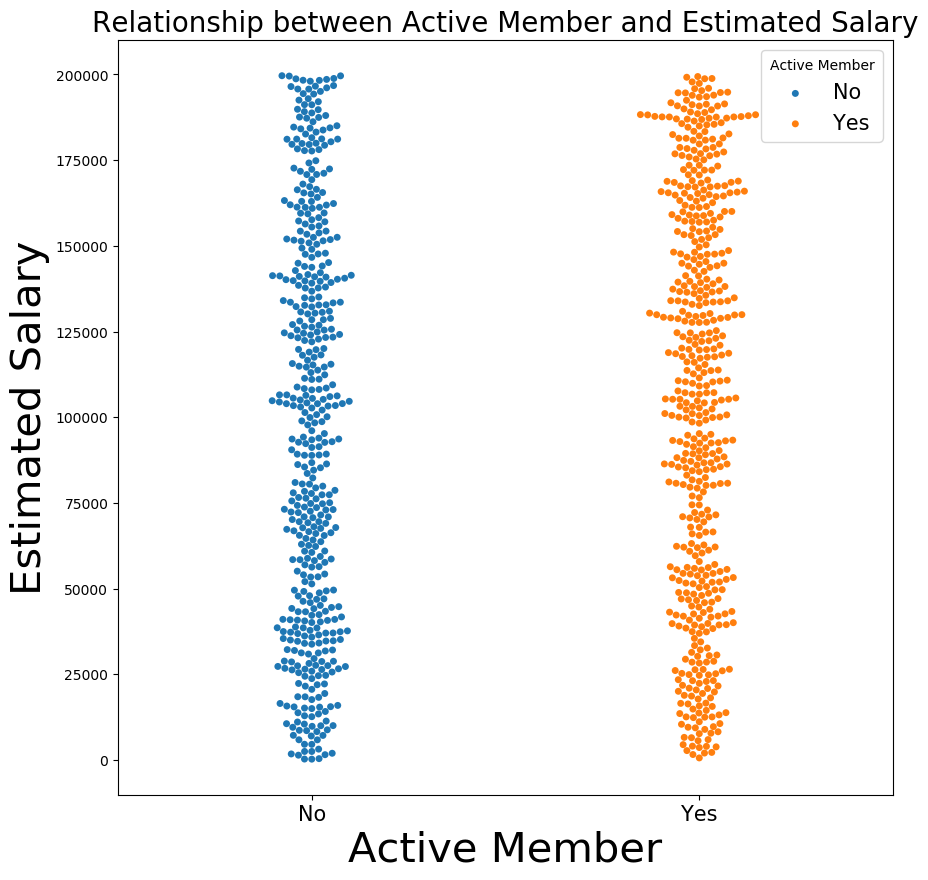

In [98]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="IsActiveMember", y="EstimatedSalary", hue="IsActiveMember", data=CustomerData)
ax.set_title("Relationship between Active Member and Estimated Salary", fontsize=20)
ax.set_xlabel("Active Member", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Estimated Salary", fontsize=30)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Active Member')
ax.set_xticklabels(["No","Yes"])

[Text(0,0,'No'), Text(0,0,'Yes')]

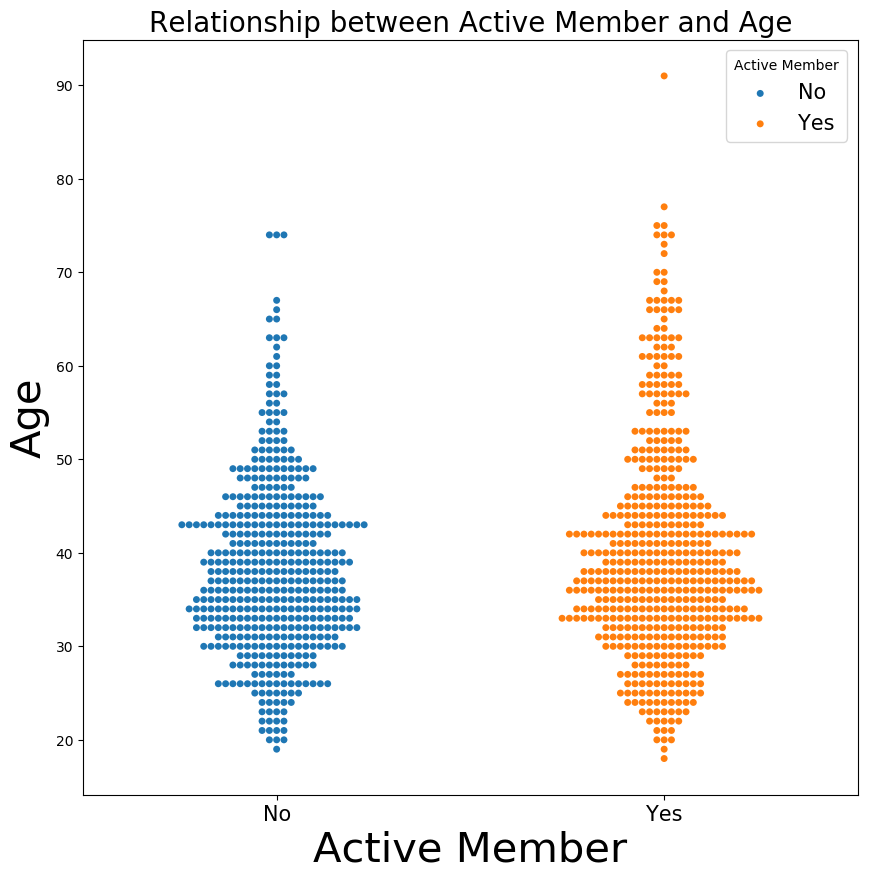

In [99]:
#Comparing Categorical Variables with the Numeric Variables
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.swarmplot(x="IsActiveMember", y="Age", hue="IsActiveMember", data=CustomerData)
ax.set_title("Relationship between Active Member and Age", fontsize=20)
ax.set_xlabel("Active Member", fontsize=30)
plt.xticks(rotation = 0,fontsize=15)
ax.set_ylabel("Age", fontsize=30)
ax.legend(["No","Yes"],loc=1,fontsize=15,title='Active Member')
ax.set_xticklabels(["No","Yes"])

In [100]:
CustomerData.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

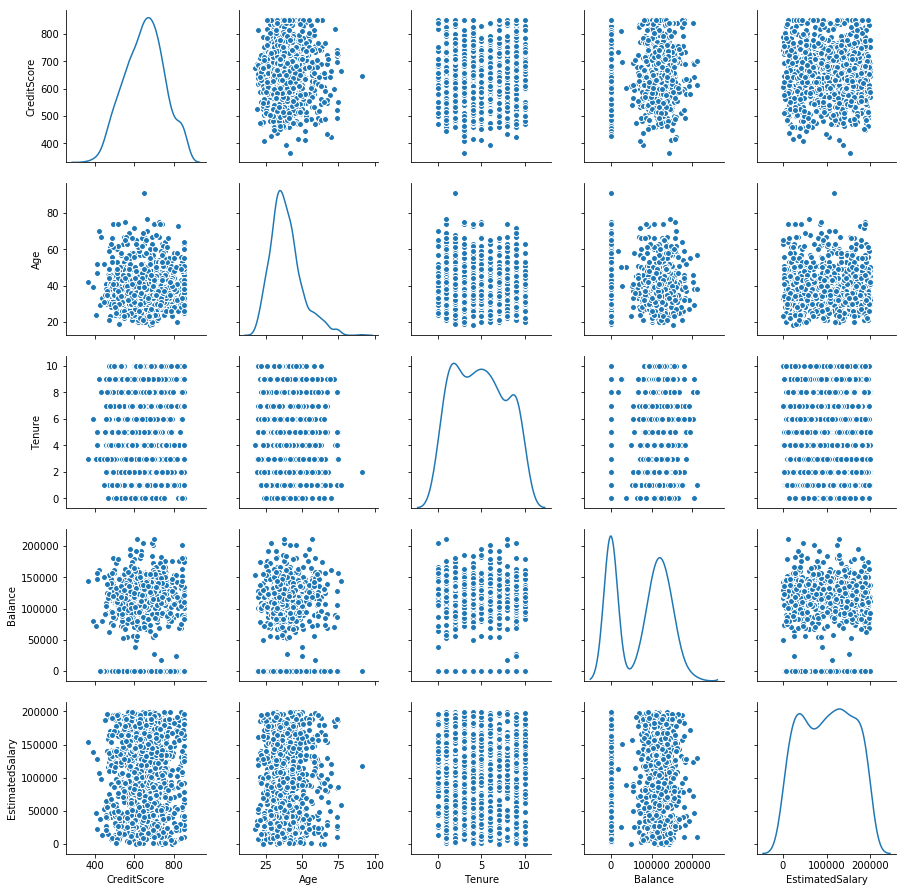

In [101]:
#Pairplot of all Numeric attribute
DataHist = CustomerData.drop(['RowNumber', 'CustomerId','Surname','Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited'], axis=1)
sns.pairplot(DataHist,diag_kind="kde")


Text(0.5,1,'Outliers Detection in Credit Score Attribute')

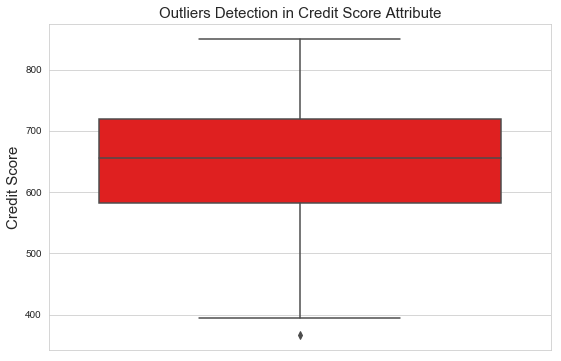

In [9]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. CreditScore
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="CreditScore", data=CustomerData,orient="v",color='red')
plt.ylabel("Credit Score",fontsize=15)
plt.title("Outliers Detection in Credit Score Attribute",fontsize=15)

376.5
924.5


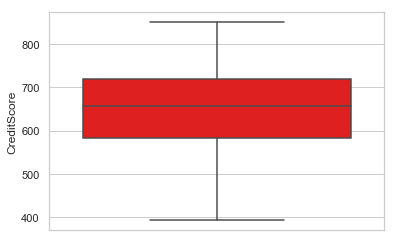

In [10]:
Name = ['CreditScore']
for i in Name:
    q75, q25 = np.percentile(CustomerData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

CustomerDataCopy = CustomerData.copy()

CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,i] < min].index)
CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,'CreditScore'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x="CreditScore", data=CustomerDataCopy,orient="v",color='red')
CustomerData = CustomerDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


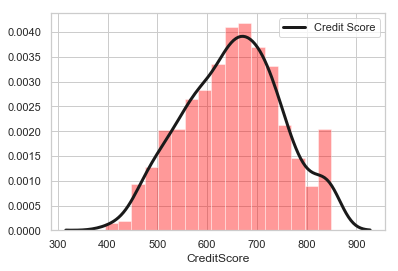

In [11]:
 
sns.distplot(CustomerData['CreditScore'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Credit Score"})


Text(0.5,1,'Outliers Detection in Age Attribute')

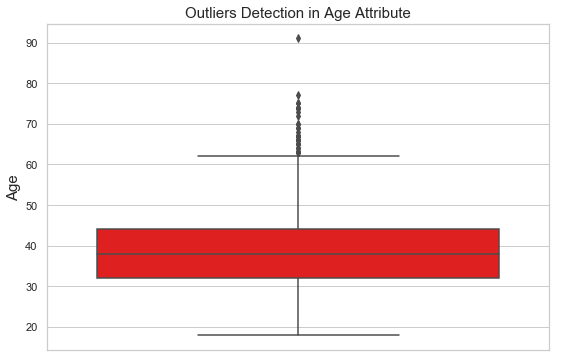

In [12]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. CreditScore
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Age", data=CustomerData,orient="v",color='red')
plt.ylabel("Age",fontsize=15)
plt.title("Outliers Detection in Age Attribute",fontsize=15)

14.0
62.0


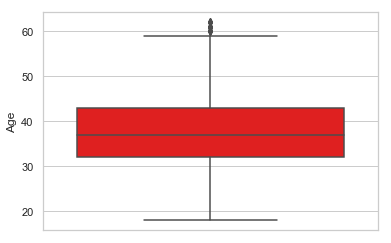

In [13]:
Name = ['Age']
for i in Name:
    q75, q25 = np.percentile(CustomerData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

CustomerDataCopy = CustomerData.copy()

CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,i] < min].index)
CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,'Age'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x="Age", data=CustomerDataCopy,orient="v",color='red')
CustomerData = CustomerDataCopy


15.5
59.5


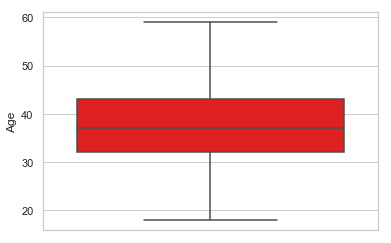

In [14]:
Name = ['Age']
for i in Name:
    q75, q25 = np.percentile(CustomerData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

CustomerDataCopy = CustomerData.copy()

CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,i] < min].index)
CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,'Age'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x="Age", data=CustomerDataCopy,orient="v",color='red')
CustomerData = CustomerDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


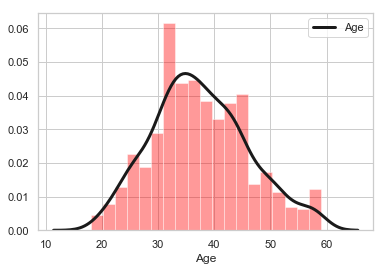

In [15]:
sns.distplot(CustomerData['Age'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Age"})

Text(0.5,1,'Outliers Detection in Tenure Attribute')

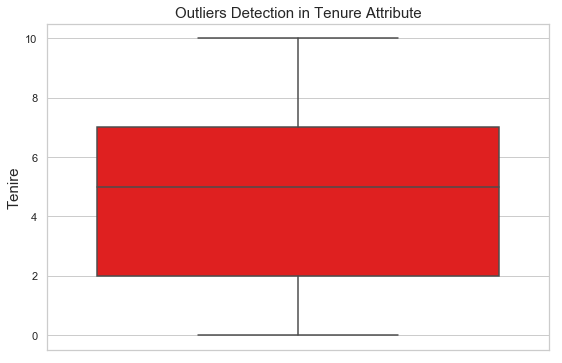

In [16]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. CreditScore
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Tenure", data=CustomerData,orient="v",color='red')
plt.ylabel("Tenire",fontsize=15)
plt.title("Outliers Detection in Tenure Attribute",fontsize=15)

-5.5
14.5


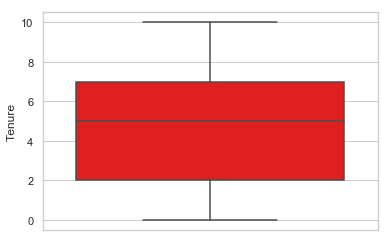

In [17]:
Name = ['Tenure']
for i in Name:
    q75, q25 = np.percentile(CustomerData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

CustomerDataCopy = CustomerData.copy()

CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,i] < min].index)
CustomerDataCopy = CustomerDataCopy.drop(CustomerDataCopy[CustomerDataCopy.loc[:,'Tenure'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x="Tenure", data=CustomerDataCopy,orient="v",color='red')
CustomerData = CustomerDataCopy


Text(0.5,1,'Outliers Detection in Balance Attribute')

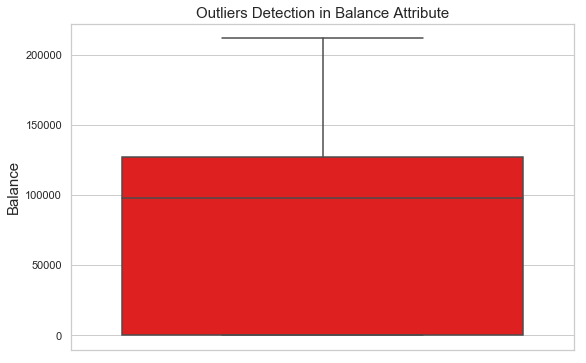

In [18]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. CreditScore
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Balance", data=CustomerData,orient="v",color='red')
plt.ylabel("Balance",fontsize=15)
plt.title("Outliers Detection in Balance Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Estimated Salary Attribute')

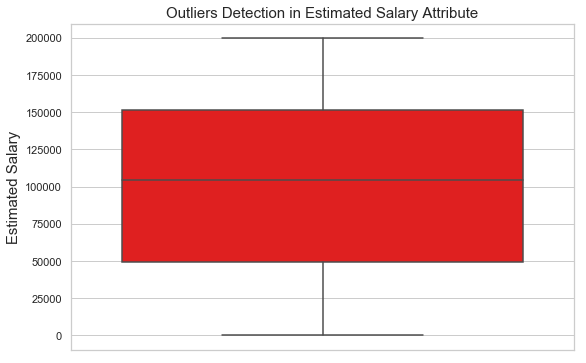

In [19]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. CreditScore
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="EstimatedSalary", data=CustomerData,orient="v",color='red')
plt.ylabel("Estimated Salary",fontsize=15)
plt.title("Outliers Detection in Estimated Salary Attribute",fontsize=15)

In [20]:
#Rechecking MIssing values after outlier analysis
CustomerData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
CustomerData.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0      10001    15798485    Copley          565    France    Male   31   
1      10002    15588959     T'ang          569    France    Male   34   
2      10003    15624896        Ku          669    France  Female   20   
3      10004    15639629  McConnan          694    France    Male   39   
4      10005    15638852     Ts'ui          504     Spain    Male   28   

   Tenure    Balance NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0       1       0.00             1         0              1         20443.08   
1       4       0.00             1         0              1          4045.90   
2       7       0.00             2         1              0        128838.67   
3       4  173255.48             1         1              1         81293.10   
4      10  109291.36             1         1              1        187593.15   

  Exited  
0      0  
1      0  
2      0  
3      0  
4      0

In [22]:
#Draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

CustomerData.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


In [23]:
# Feature  Scaling
#Normality Check

cnames = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
for i in cnames :
    print(i)
    CustomerData[i] = (CustomerData[i] - (CustomerData[i]).min())/(CustomerData[i].max() - (CustomerData[i]).min())
CustomerData.head()

CreditScore
Age
Tenure
Balance
EstimatedSalary


RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0      10001    15798485    Copley     0.375000    France    Male  0.317073   
1      10002    15588959     T'ang     0.383772    France    Male  0.390244   
2      10003    15624896        Ku     0.603070    France  Female  0.048780   
3      10004    15639629  McConnan     0.657895    France    Male  0.512195   
4      10005    15638852     Ts'ui     0.241228     Spain    Male  0.243902   

   Tenure   Balance NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0     0.1  0.000000             1         0              1         0.101298   
1     0.4  0.000000             1         0              1         0.019060   
2     0.7  0.000000             2         1              0         0.644939   
3     0.4  0.819096             1         1              1         0.406481   
4     1.0  0.516695             1         1              1         0.939612   

  Exited  
0      0  
1      0  
2      0  
3      0  
4      0

In [24]:
CustomerData1 = CustomerData

In [25]:
CustomerData = CustomerData.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [26]:
CustomerData.head()

CreditScore Geography  Gender       Age  Tenure   Balance NumOfProducts  \
0     0.375000    France    Male  0.317073     0.1  0.000000             1   
1     0.383772    France    Male  0.390244     0.4  0.000000             1   
2     0.603070    France  Female  0.048780     0.7  0.000000             2   
3     0.657895    France    Male  0.512195     0.4  0.819096             1   
4     0.241228     Spain    Male  0.243902     1.0  0.516695             1   

  HasCrCard IsActiveMember  EstimatedSalary Exited  
0         0              1         0.101298      0  
1         0              1         0.019060      0  
2         1              0         0.644939      0  
3         1              1         0.406481      0  
4         1              1         0.939612      0

In [27]:
#Encoding Geograpghy  Variable
CustomerData['Geography'].replace('France',1,inplace=True)
CustomerData['Geography'].replace('Spain',2,inplace=True)
CustomerData['Geography'].replace('Germany',3,inplace=True)

In [28]:
#Encoding Gender Variable
CustomerData['Gender'].replace('Male',1,inplace=True)
CustomerData['Gender'].replace('Female',2,inplace=True)

In [29]:
CustomerData.head()

CreditScore  Geography  Gender       Age  Tenure   Balance NumOfProducts  \
0     0.375000          1       1  0.317073     0.1  0.000000             1   
1     0.383772          1       1  0.390244     0.4  0.000000             1   
2     0.603070          1       2  0.048780     0.7  0.000000             2   
3     0.657895          1       1  0.512195     0.4  0.819096             1   
4     0.241228          2       1  0.243902     1.0  0.516695             1   

  HasCrCard IsActiveMember  EstimatedSalary Exited  
0         0              1         0.101298      0  
1         0              1         0.019060      0  
2         1              0         0.644939      0  
3         1              1         0.406481      0  
4         1              1         0.939612      0

In [30]:
CustomerData.tail()

CreditScore  Geography  Gender       Age  Tenure   Balance NumOfProducts  \
994     0.460526          1       2  0.634146     0.8  0.484648             1   
995     0.300439          1       2  0.390244     1.0  0.559317             1   
996     0.396930          3       1  0.756098     0.2  0.646854             1   
998     0.616228          2       1  0.121951     0.8  0.000000             2   
999     0.635965          1       1  0.682927     1.0  0.000000             2   

    HasCrCard IsActiveMember  EstimatedSalary Exited  
994         1              0         0.726588      1  
995         1              0         0.131640      0  
996         1              0         0.011246      0  
998         0              0         0.812970      0  
999         1              0         0.945530      0

In [52]:
#Splitting Target varible from the main data set
CustomerDataTarget = CustomerData['Exited']
CustomerDataIndependent = CustomerData.drop(['Exited'],axis=1)

In [53]:
#Splitting DataSet for Training and Testing Purpose
X_Train,X_Test,Y_Train,Y_Test = train_test_split(CustomerDataIndependent,CustomerDataTarget,test_size=0.2)

In [54]:
#Training Decision tree
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',splitter='best',max_depth=5,random_state=0)
DecisionTree.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
Predictions = DecisionTree.predict(X_Test)

In [56]:
y_actu = pd.Series(Y_Test, name='Actual')
y_pred = pd.Series(Predictions, name='Predicted')
Confusion = pd.crosstab(y_actu,y_pred)
Confusion

Predicted   0  1
Actual          
0          19  7
1           7  2

In [57]:
TN = Confusion.iloc[0,0]
TP = Confusion.iloc[1,1]
FN = Confusion.iloc[1,0]
FP = Confusion.iloc[0,1]
Accuracy =accuracy_score(Y_Test,Predictions)*100
print(Accuracy)

81.48148148148148


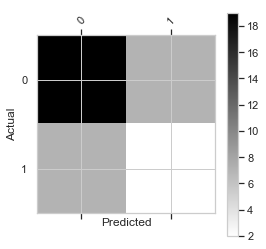

In [58]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(Confusion)

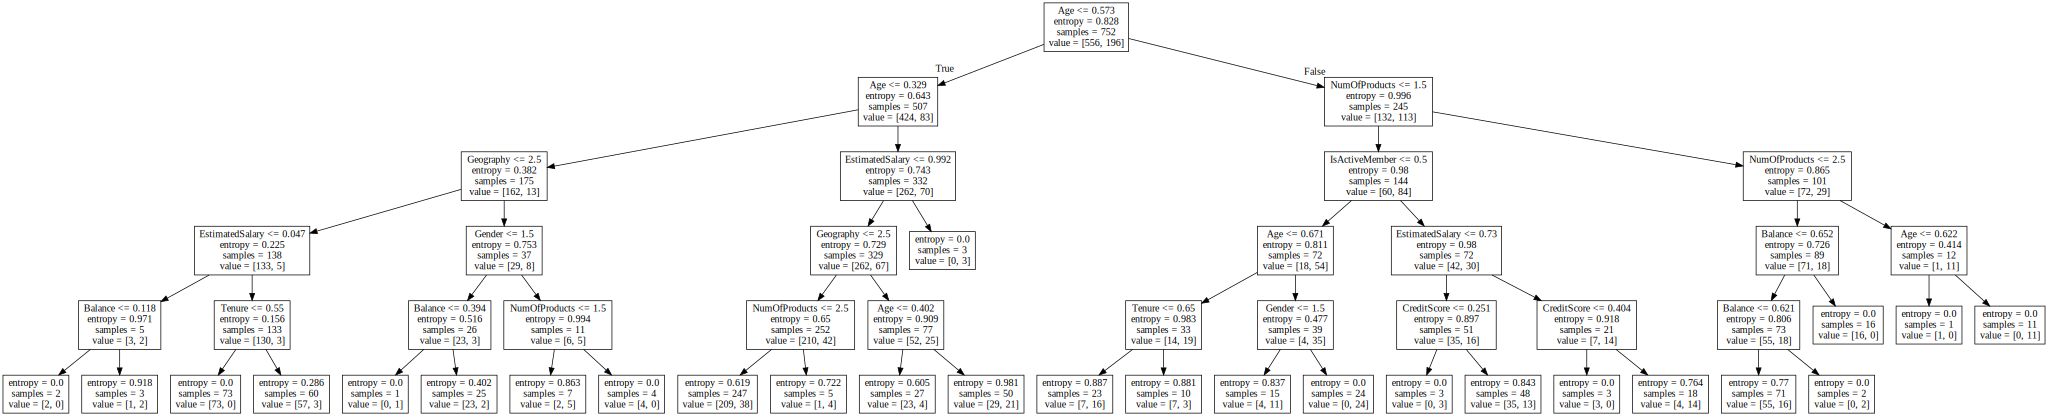

In [61]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import collections
dot_data = tree.export_graphviz(DecisionTree,
                                feature_names=X_Train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree1.png')

tree.export_graphviz(DecisionTree, out_file='tree1.dot') #produces dot file

import pydot
from graphviz import Source
from IPython.display import SVG
graph = Source( tree.export_graphviz(DecisionTree, out_file=None, feature_names=X_Train.columns))
SVG(graph.pipe(format='svg'))

In [66]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 100,criterion='gini',max_depth=5,random_state=0)
RandomForest.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
Predictions = RandomForest.predict(X_Test)

In [68]:
y_actu = pd.Series(Y_Test, name='Actual')
y_pred = pd.Series(Predictions, name='Predicted')
Confusion = pd.crosstab(y_actu,y_pred)
Confusion

Predicted   0  1
Actual          
0          23  3
1           8  1

In [69]:
TN = Confusion.iloc[0,0]
TP = Confusion.iloc[1,1]
FN = Confusion.iloc[1,0]
FP = Confusion.iloc[0,1]
Accuracy =accuracy_score(Y_Test,Predictions)*100
print(Accuracy)

86.24338624338624


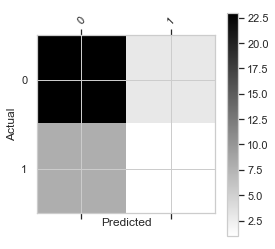

In [70]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(Confusion)

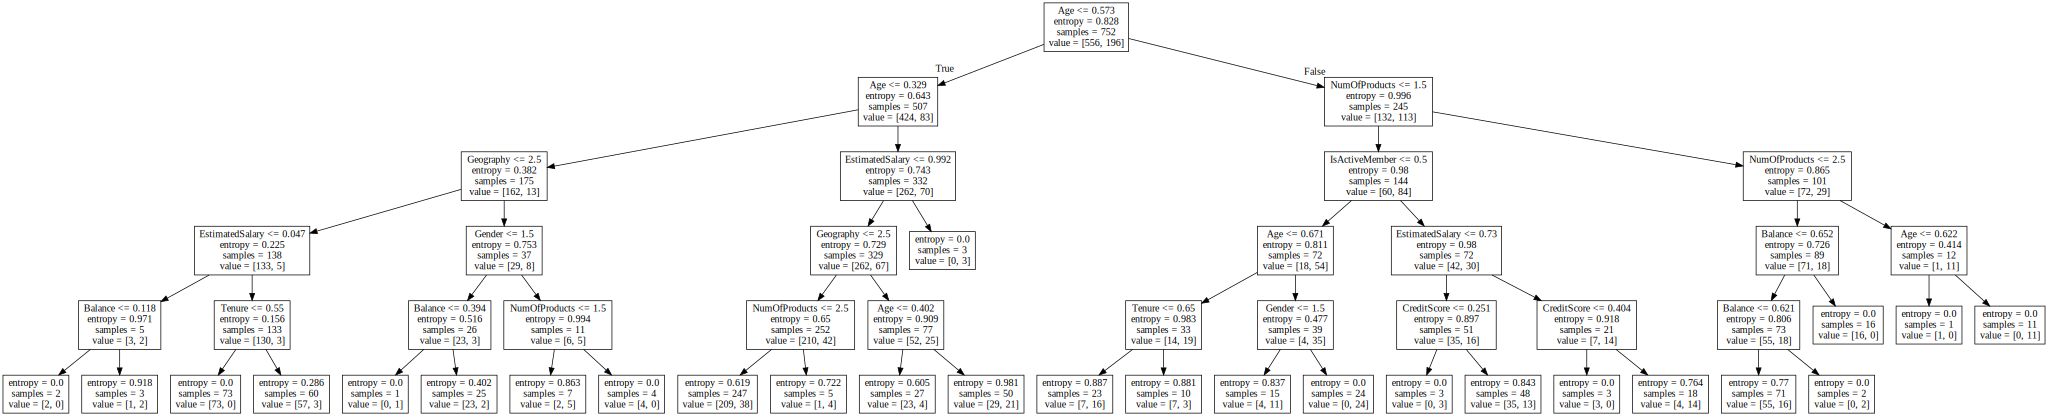

In [71]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import collections
dot_data = tree.export_graphviz(DecisionTree,
                                feature_names=X_Train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('Forest.png')

tree.export_graphviz(DecisionTree, out_file='Forest.dot') #produces dot file

import pydot
from graphviz import Source
from IPython.display import SVG
graph = Source( tree.export_graphviz(DecisionTree, out_file=None, feature_names=X_Train.columns))
SVG(graph.pipe(format='svg'))

In [95]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(random_state=0)
Log.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
Predictions = Log.predict(X_Test)

In [97]:
y_actu = pd.Series(Y_Test, name='Actual')
y_pred = pd.Series(Predictions, name='Predicted')
Confusion = pd.crosstab(y_actu,y_pred)
Confusion

Predicted   0  1
Actual          
0          22  4
1           8  1

In [98]:
TN = Confusion.iloc[0,0]
TP = Confusion.iloc[1,1]
FN = Confusion.iloc[1,0]
FP = Confusion.iloc[0,1]
Accuracy =accuracy_score(Y_Test,Predictions)*100
print(Accuracy)

82.01058201058201


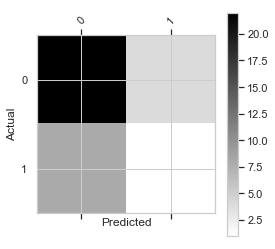

In [99]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(Confusion)

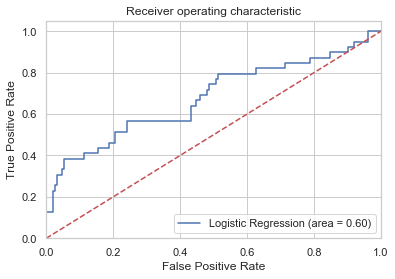

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_Test, Log.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, Log.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [100]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
Predictions = KNN.predict(X_Test)

In [108]:
y_actu = pd.Series(Y_Test, name='Actual')
y_pred = pd.Series(Predictions, name='Predicted')
Confusion = pd.crosstab(y_actu,y_pred)
Confusion

Predicted   0  1
Actual          
0          23  3
1           8  1

In [109]:
TN = Confusion.iloc[0,0]
TP = Confusion.iloc[1,1]
FN = Confusion.iloc[1,0]
FP = Confusion.iloc[0,1]
Accuracy =accuracy_score(Y_Test,Predictions)*100
print(Accuracy)

76.71957671957672


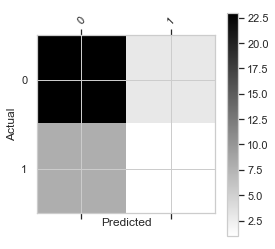

In [110]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(Confusion)

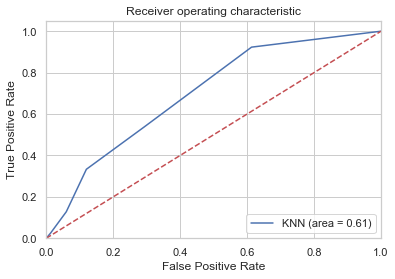

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_Test, KNN.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, KNN.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [112]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
Naive = GaussianNB()
Naive.fit(X_Train,Y_Train)

GaussianNB(priors=None)

In [113]:
Predictions = Naive.predict(X_Test)

In [114]:
y_actu = pd.Series(Y_Test, name='Actual')
y_pred = pd.Series(Predictions, name='Predicted')
Confusion = pd.crosstab(y_actu,y_pred)
Confusion

Predicted   0  1
Actual          
0          22  4
1           8  1

In [115]:
TN = Confusion.iloc[0,0]
TP = Confusion.iloc[1,1]
FN = Confusion.iloc[1,0]
FP = Confusion.iloc[0,1]
Accuracy =accuracy_score(Y_Test,Predictions)*100
print(Accuracy)

83.06878306878306


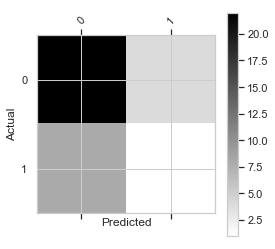

In [116]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(Confusion)

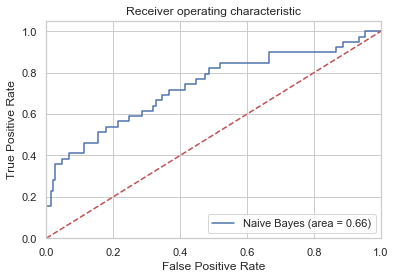

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_Test, Naive.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, Naive.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# For Random Forest will be our Final model as it is giving Higest accuracy of Prediction which is around 86 %